#**[ Group 11 ] - Heart Disase**

Group Members:

Tan Ufuk Çelik,

Mehmet Barış Bozkurt,

Utkan Yılmaz,

Alper Mert.

#**Introduction**

In our project topic, we are based on the factors that cause a heart disease. We want to find the variables that have a direct impact on the heart disease. 
To find this impact, we are planning to check the correlation between the gender, age, chestPain, tension and cholesterol.
After that, we are going to check the sites that are given to us from kaggle for variables as gender, age and chestPain.
And also, for tension and cholesterol we will check the datas from David Lapp(Kaggle).
When we examined these data files, we thought that relationships could be established between the variables we have. Using these relationships, we can form a hypothesis and test this hypothesis during the project process.


### Utilized Datasets

We used two datasets which our professor has shared with us: 

https://www.kaggle.com/datasets/meetnagadia/heart-disease 

https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset 

The first link is our main data and, second link is for extra datasets that we chose.

We have 829 observations, our data types are string and float. We have 13 columns. The histograms of cholesterol and tension (restpbs) are right-skewed. The histogram of age is almost symmetric. 

##**EXPLORATORY DATA ANALYSIS**


## Variables and Heart Disease Relationships:

<font color="red">*Age - Heart Disease*</font>: These graphs show the relationship between age ranges and the number of heart diseases. It is seen that the number of heart diseases is higher in the 50-65 age range compared to other ages. 

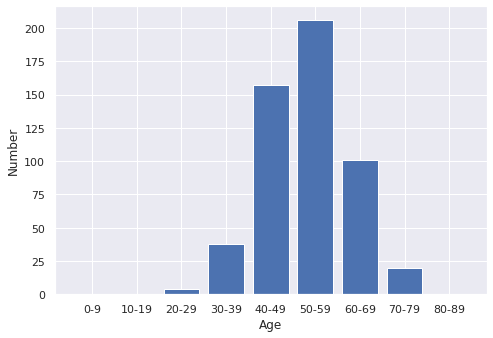

In [65]:
from pandas.core.frame import DataFrame
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv 
column_names = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","target"]
df = pd.read_csv("/content/heart.csv",names=column_names)
tar_arr = df.target.to_list()
age_array = df.age.to_list()
tar_age_array = []
for i in range(len(age_array)):
  if tar_arr[i] =='1':
    tar_age_array.append(age_array[i])
tar_age_array.sort()

arr = []

for i in range(100):
  arr.append(0)

for element in range(100):
  if str(element) in tar_age_array:
      arr[element] = tar_age_array.count(str(element))
arr_last = []

for i in range(1,10):
  arr_last.append(sum(arr[10*i-10:10*i]))


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xlabel('Age')
plt.ylabel('Number')
langs = ["0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89"]
ax.bar(langs,arr_last)
plt.show()


#----------------------------------------------------------------------------------------------------------------

**When we examine this graph, we observe the distribution of the number of patients according to age ranges. According to these data, we can notice that heart diseases are almost not observed under the age of 20. There is a slight increase in the number of patients between the ages of 20-30. If we compare the number of patients aged 30-40 with the age range of 20-30, we can say that there is a significant (10 times) difference. Among the 40-50 age group, the rate of heart disease progresses by up to three times compared to the 30-40 age group. In the 50-60 age group, heart diseases reach their maximum point. It would not be wrong to say that the age group with the most heart diseases is 50-60 years old. The number of patients, who have always come to this age range by increasing, progresses by decreasing after reaching the maximum figures in the 50-60 age range. It is possible to say that the number of patients in the 60-70 age range is almost half compared to the 50-60 age range. As the age range of 70-79 passes, there is a serious decrease in the number of patients. Finally, the rate of observation of heart diseases in the age range of 80-89 decreases to almost 0.**

#-----------------------------------------------------------------------------------------------------------------

## Variables' Relationships

<font color="blue">*Age - Gender*</font>: In these figures, we understand that patients are mostly between 50 - 65 ages and women. 

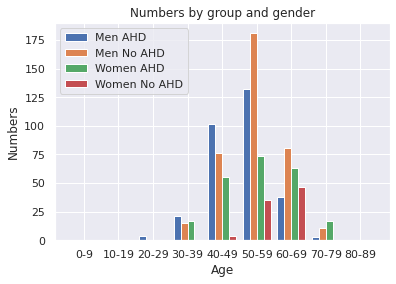

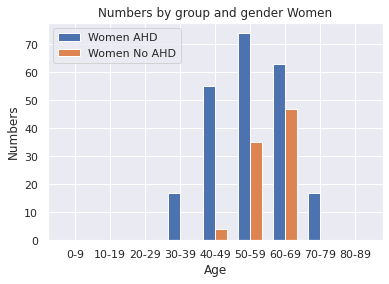

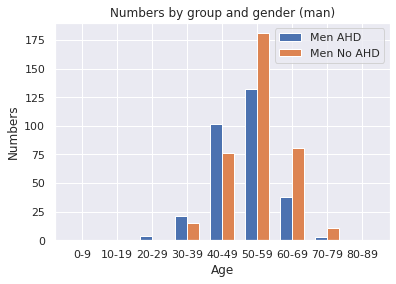

In [66]:
from pandas.core.frame import DataFrame
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv 

column_names = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","target"]
df = pd.read_csv("/content/heart.csv",names=column_names)

sex_arr = df.sex.to_list()
age_arr = df.age.to_list()
tar_arr = df.target.to_list()

tar_arr.pop(0)
sex_arr.pop(0)
age_arr.pop(0)

woman_arr = []
woman_tar0_arr = []

man_arr = []
man_tar0_arr = []

tar_age_array = []
tar0_age_array = []

for i in range(len(sex_arr)): #new distribution
  if tar_arr[i] == '1':
    if sex_arr[i] == '1':
      man_arr.append(int(age_arr[i]))
    else:
      woman_arr.append(int(age_arr[i]))
  else:
    if sex_arr[i] == '1':
      man_tar0_arr.append(int(age_arr[i]))
    else:
      woman_tar0_arr.append(int(age_arr[i]))


zero_arr = []
zero_arrman = []

zero_tar0_arr = []
zero_tar0_arrman = []
for i in range(100):
  zero_arr.append(0) 
  zero_arrman.append(0)
  zero_tar0_arr.append(0)
  zero_tar0_arrman.append(0)

for element in range(100): # To determine the number of patient(s) in a specific age e.g age 58 = 3 patients
  if element in woman_arr:
    zero_arr[element] = woman_arr.count(element)
  if element in man_arr:
    zero_arrman[element] = man_arr.count(element)
  if element in woman_tar0_arr:
    zero_tar0_arr[element] = woman_tar0_arr.count(element)
  if element in man_arr:
    zero_tar0_arrman[element] = man_tar0_arr.count(element)


woman_arr_sums = []
woman_arr_tar0_sums = []

man_arr_sums = []
man_arr_tar0_sums = []

for i in range(1,10):
  woman_arr_sums.append(sum(zero_arr[10*i-10:10*i]))
  man_arr_sums.append(sum(zero_arrman[10*i-10:10*i]))

  woman_arr_tar0_sums.append(sum(zero_tar0_arr[10*i-10:10*i]))
  man_arr_tar0_sums.append(sum(zero_tar0_arrman[10*i-10:10*i]))




langs = ["0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89"]
N = 9

ind = np.arange(N) 
width = 0.20       
plt.bar(ind+width, man_arr_sums, width, label='Men AHD')
plt.bar(ind + width*2, man_arr_tar0_sums, width, label='Men No AHD')
plt.bar(ind + width*3, woman_arr_sums, width, label='Women AHD')
plt.bar(ind + width*4, woman_arr_tar0_sums,width, label = 'Women No AHD')
plt.xlabel('Age')
plt.ylabel('Numbers')
plt.title('Numbers by group and gender')

plt.xticks(ind + width * 2.5 , ("0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89"))
plt.legend(loc = 'best')
plt.show()

ind = np.arange(N) 
width = 0.35       

plt.bar(ind, woman_arr_sums, width, label='Women AHD')
plt.bar(ind + width, woman_arr_tar0_sums,width, label = 'Women No AHD')
plt.xlabel('Age')
plt.ylabel('Numbers')
plt.title('Numbers by group and gender Women')

plt.xticks(ind + width /2 , ("0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89"))
plt.legend(loc = 'best')
plt.show()

N = 9

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, man_arr_sums, width, label='Men AHD')
plt.bar(ind + width, man_arr_tar0_sums, width, label='Men No AHD')

plt.xlabel('Age')
plt.ylabel('Numbers')
plt.title('Numbers by group and gender (man)')

plt.xticks(ind + width / 2 , ("0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89"))
plt.legend(loc = 'best')
plt.show()

#----------------------------------------------------------------------------------------------------------------

**When we examine this table, we can observe the incidence of AHD in men and women and their distribution by age groups. We can say that until the age of 30, we do not have a sufficient data set to comment. In the 30-40 age range, the proportion of men and women with AHD is higher than for people without AHD. This situation continues in the 40-50 age range, and those with AHD have a higher number than those who do not. The number of patients between the ages of 50-60 reaches the highest level for both genders. And for the first time, the proportion of men without AHD exceeded that of those with AHD. In the 50-60 age range, the number of women with and without AHD has come so close to each other for the first time. In general, it is possible to say that the number of men with AHD is higher than the number of women with AHD. And it is possible to say that the number of women with AHD is more crowded than women without AHD.**

#----------------------------------------------------------------------------------------------------------------

<font color="blue">*Gender - Chol*</font>: This figures show the relationship between gender and cholesterol level. We observe that the cholesterol level of women is higher than that of men.

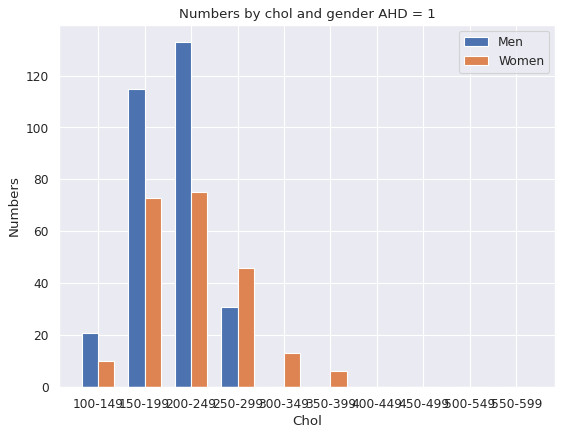

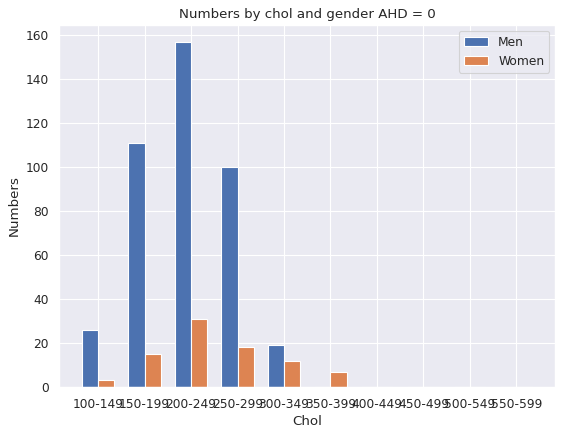

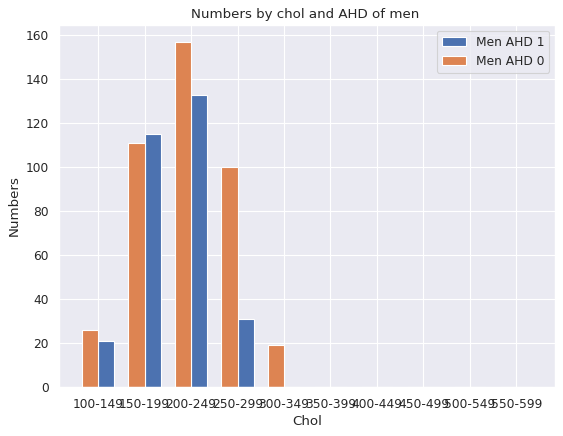

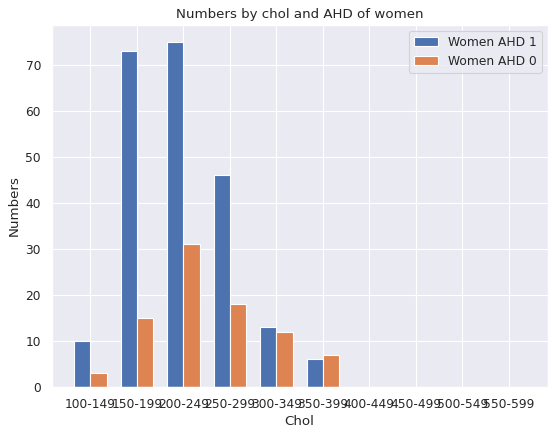

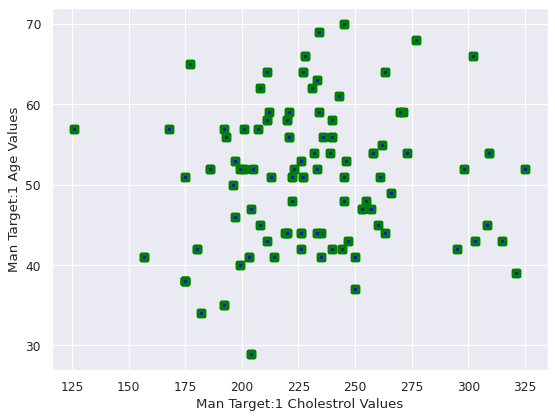

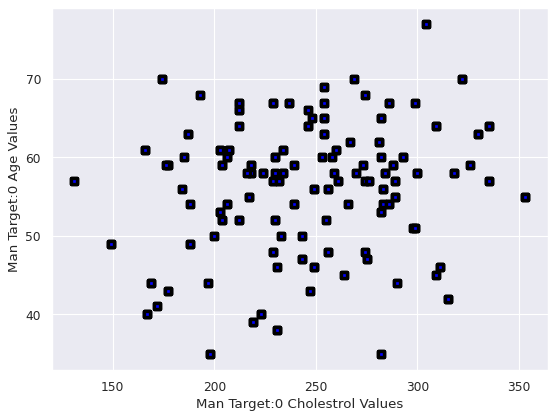

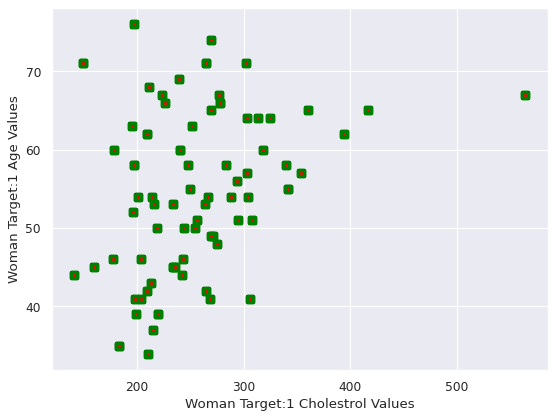

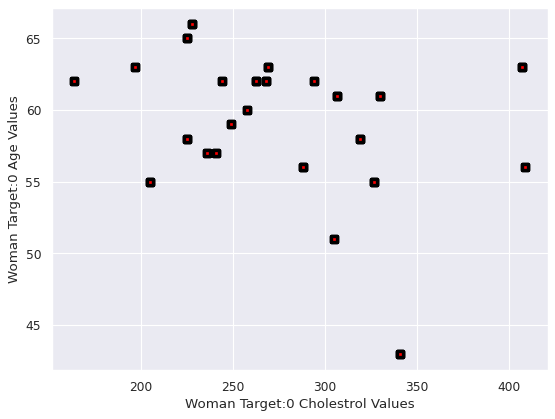

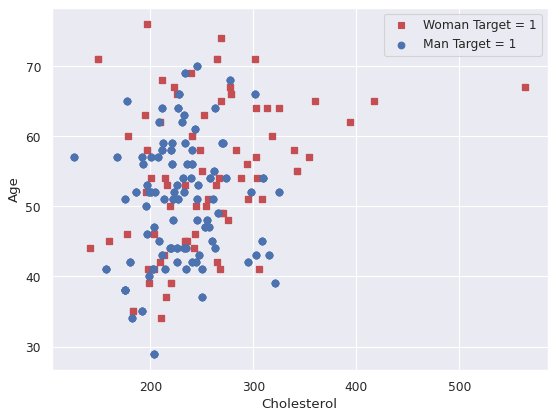

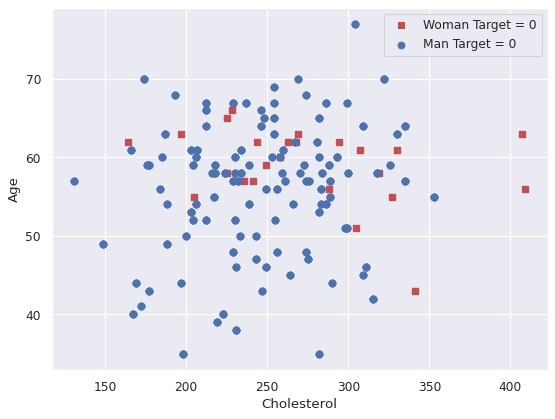

In [67]:
from pandas.core.frame import DataFrame
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv 

column_names = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","target"]
df = pd.read_csv("/content/heart.csv",names=column_names)

tar_arr = df.target.to_list()
tar_arr.pop(0)

sex_arr = df.sex.to_list()
sex_arr.pop(0)

chol_arr = df.chol.to_list()
chol_arr.pop(0)

age_arr = df.age.to_list()
age_arr.pop(0)

man_tar_chol_arr = []
man_tar0_chol_arr = []
man_tar_chol_age_arr = []
man_tar0_chol_age_arr = []

woman_tar_chol_arr = []
woman_tar0_chol_arr = []
woman_tar_chol_age_arr = []
woman_tar0_chol_age_arr = []


for i in range(len(chol_arr)):
  if tar_arr[i] =='1':
    if sex_arr[i] == '1':
      man_tar_chol_arr.append(int(chol_arr[i]))
      man_tar_chol_age_arr.append(int(age_arr[i]))
    else:
      woman_tar_chol_arr.append(int(chol_arr[i]))
      woman_tar_chol_age_arr.append(int(age_arr[i]))
  else:
    if sex_arr[i] == '1':
      man_tar0_chol_arr.append(int(chol_arr[i]))
      man_tar0_chol_age_arr.append(int(age_arr[i]))
    else:
      woman_tar0_chol_arr.append(int(chol_arr[i]))
      woman_tar0_chol_age_arr.append(int(age_arr[i]))

woman_arr_sums = []
woman_tar0_arr_sums = []

man_arr_sums = []
man_tar0_arr_sums = []

bps_max = 0
bps_min = 0

chol_arr.sort()

bps_max = chol_arr[-1]
bps_min = chol_arr[0]

scalar = 50
rnge = ((int(bps_max)-int(bps_min)) // 50)

for i in range(int(rnge+2)):
  man_arr_sums.append(0)
  woman_arr_sums.append(0)
  woman_tar0_arr_sums.append(0)
  man_tar0_arr_sums.append(0)




x = 0

for i in range(int(chol_arr[0]),int(chol_arr[-1])):
  if int(chol_arr[0]) <= i <= int(chol_arr[0])+ (scalar-1):
    woman_arr_sums[x] += int(woman_tar_chol_arr.count(i))
    man_arr_sums[x] += int(man_tar_chol_arr.count(i))
    if i == int(chol_arr[0])+ (1*scalar-1):
      x+=1
   
  elif int(chol_arr[0])+50 <= i <= int(chol_arr[0])+ (2*scalar-1):
    woman_arr_sums[x] += int(woman_tar_chol_arr.count(i))
    man_arr_sums[x] += int(man_tar_chol_arr.count(i))
    if i == int(chol_arr[0])+ (2*scalar-1):
      x+=1
 
  elif int(chol_arr[0])+100 <= i <= int(chol_arr[0])+ (3*scalar-1):
    woman_arr_sums[x] += int(woman_tar_chol_arr.count(i))
    man_arr_sums[x] += int(man_tar_chol_arr.count(i))
    if i == int(chol_arr[0])+ (3*scalar-1):
      x+=1
 
  elif int(chol_arr[0])+150 <= i <= int(chol_arr[0])+ (4*scalar-1):
    woman_arr_sums[x] += int(woman_tar_chol_arr.count(i))
    man_arr_sums[x] += int(man_tar_chol_arr.count(i))
    if i == int(chol_arr[0])+ (4*scalar-1):
      x+=1
 
  elif int(chol_arr[0])+200 <= i <= int(chol_arr[0])+ (5*scalar-1):
    woman_arr_sums[x] += int(woman_tar_chol_arr.count(i))
    man_arr_sums[x] += int(man_tar_chol_arr.count(i))
    if i == int(chol_arr[0])+ (5*scalar-1):
      x+=1
 
  elif int(chol_arr[0])+250 <= i <= int(chol_arr[0])+ (6*scalar-1):
    woman_arr_sums[x] += int(woman_tar_chol_arr.count(i))
    man_arr_sums[x] += int(man_tar_chol_arr.count(i))
    if i == int(chol_arr[0])+ (6*scalar-1):
      x+=1 

  elif int(chol_arr[0])+300 <= i <= int(chol_arr[0])+ (7*scalar-1):
    woman_arr_sums[x] += int(woman_tar_chol_arr.count(i))
    man_arr_sums[x] += int(man_tar_chol_arr.count(i))
    if i == int(chol_arr[0])+ (6*scalar-1):
      x+=1 

  elif int(chol_arr[0])+350 <= i <= int(chol_arr[0])+ (8*scalar-1):
    woman_arr_sums[x] += int(woman_tar_chol_arr.count(i))
    man_arr_sums[x] += int(man_tar_chol_arr.count(i))
    if i == int(chol_arr[0])+ (6*scalar-1):
      x+=1 

  elif int(chol_arr[0])+450 <= i <= int(chol_arr[0])+ (9*scalar-1):
    woman_arr_sums[x] += int(woman_tar_chol_arr.count(i))
    man_arr_sums[x] += int(man_tar_chol_arr.count(i))
    if i == int(chol_arr[0])+ (6*scalar-1):
      x+=1 

  elif int(chol_arr[0])+500 <= i <= int(chol_arr[0])+ (10*scalar-1):
    woman_arr_sums[x] += int(woman_tar_chol_arr.count(i))
    man_arr_sums[x] += int(man_tar_chol_arr.count(i))
    if i == int(chol_arr[0])+ (6*scalar-1):
      x+=1 

x = 0
for i in range(int(chol_arr[0]),int(chol_arr[-1])):
  
  if int(chol_arr[0]) <= i <= int(chol_arr[0])+ (scalar-1):
    woman_tar0_arr_sums[x] += int(woman_tar0_chol_arr.count(i))
    man_tar0_arr_sums[x] += int(man_tar0_chol_arr.count(i))
    if i == int(chol_arr[0])+ (1*scalar-1):
      x+=1
   
  elif int(chol_arr[0])+50 <= i <= int(chol_arr[0])+ (2*scalar-1):
    woman_tar0_arr_sums[x] += int(woman_tar0_chol_arr.count(i))
    man_tar0_arr_sums[x] += int(man_tar0_chol_arr.count(i))
    if i == int(chol_arr[0])+ (2*scalar-1):
      x+=1
 
  elif int(chol_arr[0])+100 <= i <= int(chol_arr[0])+ (3*scalar-1):
    woman_tar0_arr_sums[x] += int(woman_tar0_chol_arr.count(i))
    man_tar0_arr_sums[x] += int(man_tar0_chol_arr.count(i))
    if i == int(chol_arr[0])+ (3*scalar-1):
      x+=1
 
  elif int(chol_arr[0])+150 <= i <= int(chol_arr[0])+ (4*scalar-1):
    woman_tar0_arr_sums[x] += int(woman_tar0_chol_arr.count(i))
    man_tar0_arr_sums[x] += int(man_tar0_chol_arr.count(i))
    if i == int(chol_arr[0])+ (4*scalar-1):
      x+=1
 
  elif int(chol_arr[0])+200 <= i <= int(chol_arr[0])+ (5*scalar-1):
    woman_tar0_arr_sums[x] += int(woman_tar0_chol_arr.count(i))
    man_tar0_arr_sums[x] += int(man_tar0_chol_arr.count(i))
    if i == int(chol_arr[0])+ (5*scalar-1):
      x+=1
 
  elif int(chol_arr[0])+250 <= i <= int(chol_arr[0])+ (6*scalar-1):
    woman_tar0_arr_sums[x] += int(woman_tar0_chol_arr.count(i))
    man_tar0_arr_sums[x] += int(man_tar0_chol_arr.count(i))
    if i == int(chol_arr[0])+ (6*scalar-1):
      x+=1 

  elif int(chol_arr[0])+300 <= i <= int(chol_arr[0])+ (7*scalar-1):
    woman_tar0_arr_sums[x] += int(woman_tar0_chol_arr.count(i))
    man_tar0_arr_sums[x] += int(man_tar0_chol_arr.count(i))
    if i == int(chol_arr[0])+ (6*scalar-1):
      x+=1 

  elif int(chol_arr[0])+350 <= i <= int(chol_arr[0])+ (8*scalar-1):
    woman_tar0_arr_sums[x] += int(woman_tar0_chol_arr.count(i))
    man_tar0_arr_sums[x] += int(man_tar0_chol_arr.count(i))
    if i == int(chol_arr[0])+ (6*scalar-1):
      x+=1 

  elif int(chol_arr[0])+450 <= i <= int(chol_arr[0])+ (9*scalar-1):
    woman_tar0_arr_sums[x] += int(woman_tar0_chol_arr.count(i))
    man_tar0_arr_sums[x] += int(man_tar0_chol_arr.count(i))
    if i == int(chol_arr[0])+ (6*scalar-1):
      x+=1 

  elif int(chol_arr[0])+500 <= i <= int(chol_arr[0])+ (10*scalar-1):
    woman_tar0_arr_sums[x] += int(woman_tar0_chol_arr.count(i))
    man_tar0_arr_sums[x] += int(man_tar0_chol_arr.count(i))
    if i == int(chol_arr[0])+ (6*scalar-1):
      x+=1 
plt.figure(figsize=(8, 6), dpi=80)
N = rnge+2

ind = np.arange(N) 
width = 0.35  

plt.bar(ind, man_arr_sums, width, label='Men')
plt.bar(ind + width, woman_arr_sums, width, label='Women')
plt.xlabel('Chol')
plt.ylabel('Numbers')
plt.title('Numbers by chol and gender AHD = 1')

plt.xticks(ind + width / 2, ("100-149","150-199","200-249","250-299","300-349","350-399","400-449","450-499","500-549","550-599"))

plt.legend(loc='best')
plt.show()

plt.figure(figsize=(8, 6), dpi=80)
N = rnge+2

ind = np.arange(N) 
width = 0.35 
plt.bar(ind, man_tar0_arr_sums, width, label='Men')
plt.bar(ind + width, woman_tar0_arr_sums, width, label='Women')
plt.xlabel('Chol')
plt.ylabel('Numbers')
plt.title('Numbers by chol and gender AHD = 0')

plt.xticks(ind + width / 2, ("100-149","150-199","200-249","250-299","300-349","350-399","400-449","450-499","500-549","550-599"))

plt.legend(loc='best')
plt.show()

plt.figure(figsize=(8, 6), dpi=80)
N = rnge+2

ind = np.arange(N) 
width = 0.35 
plt.bar(ind + width, man_arr_sums, width, label='Men AHD 1')
plt.bar(ind, man_tar0_arr_sums, width, label='Men AHD 0')

plt.xlabel('Chol')
plt.ylabel('Numbers')
plt.title('Numbers by chol and AHD of men ')

plt.xticks(ind + width / 2, ("100-149","150-199","200-249","250-299","300-349","350-399","400-449","450-499","500-549","550-599"))

plt.legend(loc='best')
plt.show()

plt.figure(figsize=(8, 6), dpi=80)
N = rnge+2

ind = np.arange(N) 
width = 0.35 
plt.bar(ind, woman_arr_sums, width, label='Women AHD 1')
plt.bar(ind + width, woman_tar0_arr_sums, width, label='Women AHD 0')
plt.xlabel('Chol')
plt.ylabel('Numbers')
plt.title('Numbers by chol and AHD of women')

plt.xticks(ind + width / 2, ("100-149","150-199","200-249","250-299","300-349","350-399","400-449","450-499","500-549","550-599"))

plt.legend(loc='best')
plt.show()

plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(man_tar_chol_arr, man_tar_chol_age_arr, c ="blue",
            linewidths = 3,
            marker ="s",
            edgecolor ="green",
           )
plt.xlabel("Man Target:1 Cholestrol Values")
plt.ylabel("Man Target:1 Age Values")
plt.show()

plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(man_tar0_chol_arr, man_tar0_chol_age_arr, c ="blue",
            linewidths = 3,
            marker ="s",
            edgecolor ="black",
            )
plt.xlabel("Man Target:0 Cholestrol Values")
plt.ylabel("Man Target:0 Age Values")
plt.show()

plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(woman_tar_chol_arr, woman_tar_chol_age_arr, c ="red",
            linewidths = 3,
            marker ="s",
            edgecolor ="green",
            )
plt.xlabel("Woman Target:1 Cholestrol Values")
plt.ylabel("Woman Target:1 Age Values")
plt.show()

plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(woman_tar0_chol_arr, woman_tar0_chol_age_arr, c ="red",
            linewidths = 3,
            marker ="s",
            edgecolor ="black",
            )
plt.xlabel("Woman Target:0 Cholestrol Values")
plt.ylabel("Woman Target:0 Age Values")
plt.show()


fig = plt.figure(figsize=(8, 6), dpi=80)
ax1 = fig.add_subplot(111)

ax1.scatter(woman_tar_chol_arr, woman_tar_chol_age_arr, c='r', marker="s", label='Woman Target = 1')
ax1.scatter(man_tar_chol_arr, man_tar_chol_age_arr, c='b', marker="o", label='Man Target = 1')
plt.xlabel('Cholesterol')
plt.ylabel('Age')
plt.legend(loc='best');
plt.show()


fig = plt.figure(figsize=(8, 6), dpi=80)
ax1 = fig.add_subplot(111)

ax1.scatter(woman_tar0_chol_arr, woman_tar0_chol_age_arr, c='r', marker="s", label='Woman Target = 0')
ax1.scatter(man_tar0_chol_arr, man_tar0_chol_age_arr, c='b', marker="o", label='Man Target = 0')
plt.xlabel('Cholesterol')
plt.ylabel('Age')
plt.legend(loc='best');
plt.show()


#----------------------------------------------------------------------------------------------------------------

**When we examine the graphs here, we can determine the relationship between cholesterol levels and AHD by gender. When we examine the first graph, we are given the gender distribution of people with AHD according to their cholesterol levels. If we look here, the number of men is significantly higher, starting from the 100-149 range and up to 200-249 cholesterol levels. However, when the cholesterol level of 250-299 is reached, the number of male patients drops considerably, and we can say that there are no men with AHD at values after this range. When we examine the gender distribution of people who do not have AHD according to their cholesterol levels, it is possible to say that men show a great advantage. When we examine men with or without AHD according to their cholesterol levels, the ratio of men with and without AHD between 100-249 levels is close to each other, while the number of men without AHD reaches a great numerical superiority. For women, the situation is somewhat different. In the beginning, the number of women with AHD was watching with a great advantage, but it has stabilized since the cholesterol level of 300-349.**

#----------------------------------------------------------------------------------------------------------------

<font color="blue">*Restbps - Gender*</font>: We tried to scale patients that have heart diseases according to the their gender. We determined that most of the patients have bps between 114-133


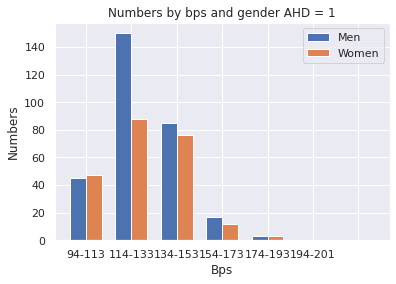

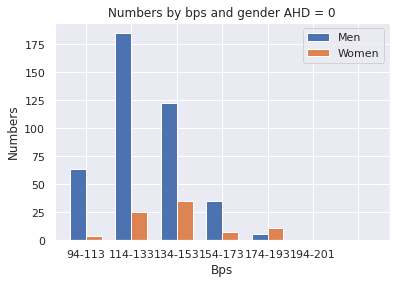

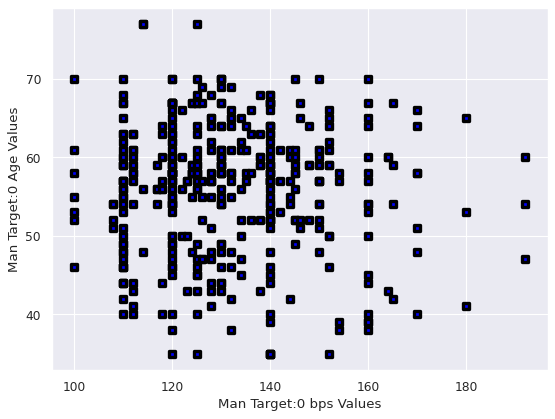

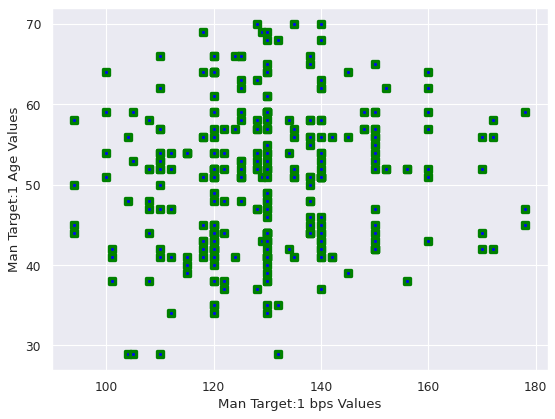

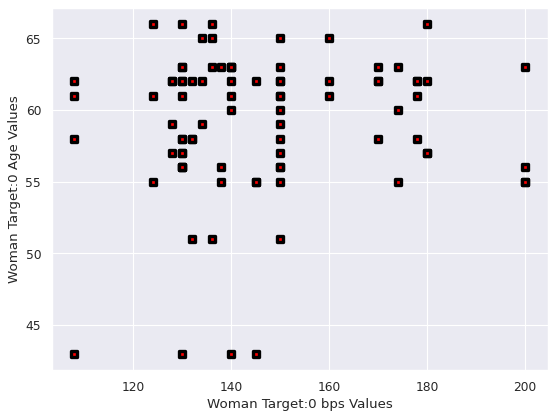

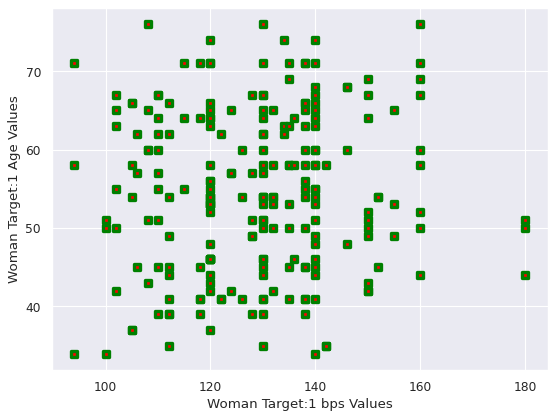

In [68]:
from pandas.core.frame import DataFrame
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv 

column_names = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","target"]
df = pd.read_csv("/content/heart.csv",names=column_names)

tar_arr = df.target.to_list()
tar_arr.pop(0)

age_arr = df.age.to_list()
age_arr.pop(0)

sex_arr = df.sex.to_list()
sex_arr.pop(0)

bps_arr = df.trestbps.to_list()
bps_arr.pop(0)

woman_age_arr = []
woman_tar0_age_arr = []

man_age_arr = []
man_tar0_age_arr = []

woman_arr = []
woman_tar0_arr = []

man_arr = []
man_tar0_arr = []

tar_bps_arr = []
tar0_bps_arr =[]


for i in range(len(sex_arr)): #new distribution
  if tar_arr[i] == '1':
    if sex_arr[i] == '1':
      man_arr.append(int(bps_arr[i]))
      man_age_arr.append(int(age_arr[i]))
    else:
      woman_arr.append(int(bps_arr[i]))
      woman_age_arr.append(int(age_arr[i]))
  else:
    if sex_arr[i] == '1':
      man_tar0_arr.append(int(bps_arr[i]))
      man_tar0_age_arr.append(int(age_arr[i]))
    else:
      woman_tar0_arr.append(int(bps_arr[i]))
      woman_tar0_age_arr.append(int(age_arr[i]))

man_Ns_arr = man_arr
woman_Ns_arr = woman_arr
man_tar0_Ns_arr = man_tar0_arr
woman_tar0_Ns_arr = woman_tar0_arr







man_arr.sort()
woman_arr.sort()
man_tar0_arr.sort()
woman_tar0_arr.sort()



woman_arr_sums = []
woman_tar0_sums = []

man_arr_sums = []
man_tar0_sums = []

bps_arr_int = []

for i in range(len(bps_arr)):
  bps_arr_int.append(int(bps_arr[i]))

bps_arr_int.sort()
bps_max = int(bps_arr_int[-1])
bps_min = int(bps_arr_int[0])

scalar = 20
rnge = ((int(bps_max)-int(bps_min)) // 20)

for i in range(int(rnge+2)):
  man_arr_sums.append(0)
  woman_arr_sums.append(0)
  man_tar0_sums.append(0)
  woman_tar0_sums.append(0)



x = 0

for i in range(bps_min,bps_max):
  if 94 <= i <= 113:
    woman_arr_sums[x] += int(woman_arr.count(i))
    man_arr_sums[x] += int(man_arr.count(i))
    if i == 113:
      x+=1
   
  elif 114 <= i <= 133:
    woman_arr_sums[x] += int(woman_arr.count(i))
    man_arr_sums[x] += int(man_arr.count(i))
    if i == 133:
      x+=1
 
  elif 134 <= i <= 153:
    woman_arr_sums[x] += int(woman_arr.count(i))
    man_arr_sums[x] += int(man_arr.count(i))
    if i == 153:
      x+=1
 
  elif 154 <= i <= 173:
    woman_arr_sums[x] += int(woman_arr.count(i))
    man_arr_sums[x] += int(man_arr.count(i))
    if i == 173:
      x+=1
 
  elif 174 <= i <= 193:
    woman_arr_sums[x] += int(woman_arr.count(i))
    man_arr_sums[x] += int(man_arr.count(i))
    if i == 193:
      x+=1
 
  elif 194 <= i <= 201:
    woman_arr_sums[x] += int(woman_arr.count(i))
    man_arr_sums[x] += int(man_arr.count(i))
    if i == 201:
      x+=1 


x = 0

for i in range(bps_min,bps_max):
  if 94 <= i <= 113:
    woman_tar0_sums[x] += int(woman_tar0_arr.count(i))
    man_tar0_sums[x] += int(man_tar0_arr.count(i))
    if i == 113:
      x+=1
   
  elif 114 <= i <= 133:
    woman_tar0_sums[x] += int(woman_tar0_arr.count(i))
    man_tar0_sums[x] += int(man_tar0_arr.count(i))
    if i == 133:
      x+=1
 
  elif 134 <= i <= 153:
    woman_tar0_sums[x] += int(woman_tar0_arr.count(i))
    man_tar0_sums[x] += int(man_tar0_arr.count(i))
    if i == 153:
      x+=1
 
  elif 154 <= i <= 173:
    woman_tar0_sums[x] += int(woman_tar0_arr.count(i))
    man_tar0_sums[x] += int(man_tar0_arr.count(i))
    if i == 173:
      x+=1
 
  elif 174 <= i <= 193:
    woman_tar0_sums[x] += int(woman_tar0_arr.count(i))
    man_tar0_sums[x] += int(man_tar0_arr.count(i))
    if i == 193:
      x+=1
 
  elif 194 <= i <= 201:
    woman_tar0_sums[x] += int(woman_tar0_arr.count(i))
    man_tar0_sums[x] += int(man_tar0_arr.count(i))
    if i == 201:
      x+=1 




N = 7

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, man_arr_sums, width, label='Men')
plt.bar(ind + width, woman_arr_sums, width, label='Women')
plt.xlabel('Bps')
plt.ylabel('Numbers')
plt.title('Numbers by bps and gender AHD = 1')

plt.xticks(ind + width / 2, ("94-113","114-133","134-153","154-173","174-193","194-201"))

plt.legend(loc='best')
plt.show()

N = 7

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, man_tar0_sums, width, label='Men')
plt.bar(ind + width, woman_tar0_sums, width, label='Women')
plt.xlabel('Bps')
plt.ylabel('Numbers')
plt.title('Numbers by bps and gender AHD = 0')

plt.xticks(ind + width / 2, ("94-113","114-133","134-153","154-173","174-193","194-201"))

plt.legend(loc='best')
plt.show()



plt.figure(figsize=(8, 6), dpi=80)
plt.scatter( man_tar0_Ns_arr,man_tar0_age_arr, c ="blue",
            linewidths = 3,
            marker ="s",
            edgecolor ="black",
            )
plt.xlabel("Man Target:0 bps Values")
plt.ylabel("Man Target:0 Age Values")
plt.show()


plt.figure(figsize=(8, 6), dpi=80)
plt.scatter( man_Ns_arr,man_age_arr, c ="blue",
            linewidths = 3,
            marker ="s",
            edgecolor ="green",
            )
plt.xlabel("Man Target:1 bps Values")
plt.ylabel("Man Target:1 Age Values")
plt.show()


plt.figure(figsize=(8, 6), dpi=80)
plt.scatter( woman_tar0_Ns_arr, woman_tar0_age_arr, c ="red",
            linewidths = 3,
            marker ="s",
            edgecolor ="black",
            )
plt.xlabel("Woman Target:0 bps Values")
plt.ylabel("Woman Target:0 Age Values")
plt.show()


plt.figure(figsize=(8, 6), dpi=80)
plt.scatter( woman_Ns_arr, woman_age_arr, c ="red",
            linewidths = 3,
            marker ="s",
            edgecolor ="green",
            )
plt.xlabel("Woman Target:1 bps Values")
plt.ylabel("Woman Target:1 Age Values")
plt.show()

#----------------------------------------------------------------------------------------------------------------

**In this graph, we see that the number of Bps and the number of people are compared according to gender for cases with or without any heart disease. The number of people is divided into men and women. These women are shown in orange and men in blue. A fasting blood sugar level is considered a lower limit of 70 milligrams per deciliter (mg/dL) and an upper limit of 126 milligrams (mg/dL) for a healthy person. A fasting blood sugar level between 70-100 mg/dL is considered normal (healthy).In the first chart of people with heart disease, we can say that the number of patients in general is not unevenly distributed by gender, but we should exclude the case where the BPS is in the range of 114-133, because in this case there is a large excess of male patients compared to female patients.
When the second graph of people who do not have any heart disease is examined, there is a remarkable situation that it is observed that men with Bps, that is, blood sugar between 114 and 153, have more people who are not sick than women. However, when the graph about the disease is examined, it is determined that the number of people with a high rate of disease among men is determined in these intervals. But for women, this is different. We can clearly say that female patients with 114 and 153 BPS have a higher rate of heart disease.**

#----------------------------------------------------------------------------------------------------------------




#Exang, Age and Gender




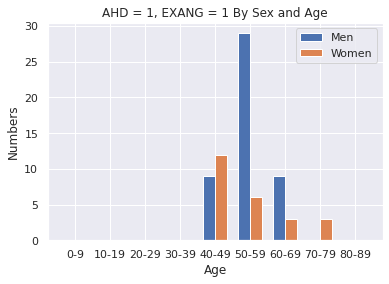

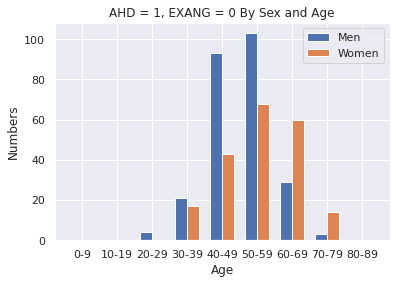

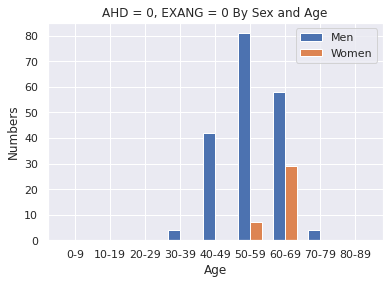

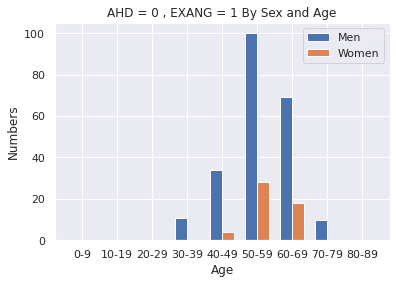

In [69]:
from pandas.core.frame import DataFrame
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv 

column_names = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","target"]
df = pd.read_csv("/content/heart.csv",names=column_names)

sex_arr = df.sex.to_list()
age_arr = df.age.to_list()
tar_arr = df.target.to_list()
exang_arr = df.exang.to_list()

tar_arr.pop(0)
sex_arr.pop(0)
age_arr.pop(0)
exang_arr.pop(0)

man_tar0_exang0_arr = []
man_tar0_exang0_age_arr = []
man_tar0_exang0_age_sum_arr = []
man_tar0_exang0_age_sum_res_arr = []


man_tar0_exang1_arr = []
man_tar0_exang1_age_arr = []
man_tar0_exang1_age_sum_arr = []
man_tar0_exang1_age_sum_res_arr = []

man_tar1_exang0_arr = []
man_tar1_exang0_age_arr = []
man_tar1_exang0_age_sum_arr = []
man_tar1_exang0_age_sum_res_arr = []

man_tar1_exang1_arr = []
man_tar1_exang1_age_arr = []
man_tar1_exang1_age_sum_arr = []
man_tar1_exang1_age_sum_res_arr = []


woman_tar0_exang0_arr = []
woman_tar0_exang0_age_arr = []
woman_tar0_exang0_age_sum_arr = []
woman_tar0_exang0_age_sum_res_arr = []

woman_tar0_exang1_arr = []
woman_tar0_exang1_age_arr = []
woman_tar0_exang1_age_sum_arr = []
woman_tar0_exang1_age_sum_res_arr = []


woman_tar1_exang0_arr = []
woman_tar1_exang0_age_arr = []
woman_tar1_exang0_age_sum_arr = []
woman_tar1_exang0_age_sum_res_arr = []

woman_tar1_exang1_arr = []
woman_tar1_exang1_age_arr = []
woman_tar1_exang1_age_sum_arr = []
woman_tar1_exang1_age_sum_res_arr = []

for i in range(len(exang_arr)):
  if tar_arr[i] =='1':
    if exang_arr[i] == '1':
      if sex_arr[i] == '1': # exang 1 tar 1 sex 1
        man_tar1_exang1_arr.append(int(exang_arr[i]))
        man_tar1_exang1_age_arr.append(int(age_arr[i]))
      else:                 # exang 1 tar 1 sex 0
        woman_tar1_exang1_arr.append(int(exang_arr[i]))
        woman_tar1_exang1_age_arr.append(int(age_arr[i]))
    else:
      if sex_arr[i] == '1': # exang 0 tar 1 sex 1
        man_tar1_exang0_arr.append(int(exang_arr[i]))
        man_tar1_exang0_age_arr.append(int(age_arr[i]))
      else:                  # exang 0 tar 1 sex 0
        woman_tar1_exang0_arr.append(int(exang_arr[i]))
        woman_tar1_exang0_age_arr.append(int(age_arr[i]))   
  else:
    if exang_arr[i] == '1': 
      if sex_arr[i] == '1': # exang 1 tar 0 sex 1
        man_tar0_exang1_arr.append(int(exang_arr[i]))
        man_tar0_exang1_age_arr.append(int(age_arr[i]))

      else:                 # exang 1 tar 0 sex 0
        woman_tar0_exang1_arr.append(int(exang_arr[i]))
        woman_tar0_exang1_age_arr.append(int(age_arr[i]))

    else:                   
      if sex_arr[i] == '1': # exang 0 tar 0 sex 1
        man_tar0_exang0_arr.append(int(exang_arr[i]))
        man_tar0_exang0_age_arr.append(int(age_arr[i]))

      else:                 # exang 0 tar 0 sex 0
        woman_tar0_exang0_arr.append(int(exang_arr[i]))
        woman_tar0_exang0_age_arr.append(int(age_arr[i]))

for i in range(100):
  if man_tar1_exang1_age_arr.count(i) > 0:
    man_tar1_exang1_age_sum_arr.append(man_tar1_exang1_age_arr.count(i))
  else:
    man_tar1_exang1_age_sum_arr.append(0)

for i in range(100):
  if man_tar1_exang0_age_arr.count(i) > 0:
    man_tar1_exang0_age_sum_arr.append(man_tar1_exang0_age_arr.count(i))
  else:
    man_tar1_exang0_age_sum_arr.append(0)

for i in range(100):
  if man_tar0_exang0_age_arr.count(i) > 0:
    man_tar0_exang0_age_sum_arr.append(man_tar0_exang0_age_arr.count(i))
  else:
    man_tar0_exang0_age_sum_arr.append(0)

for i in range(100):
  if man_tar0_exang1_age_arr.count(i) > 0:
    man_tar0_exang1_age_sum_arr.append(man_tar0_exang1_age_arr.count(i))
  else:
    man_tar0_exang1_age_sum_arr.append(0)

for i in range(100):
  if woman_tar1_exang1_age_arr.count(i) > 0:
    woman_tar1_exang1_age_sum_arr.append(woman_tar1_exang1_age_arr.count(i))
  else:
    woman_tar1_exang1_age_sum_arr.append(0)

for i in range(100):
  if woman_tar1_exang0_age_arr.count(i) > 0:
    woman_tar1_exang0_age_sum_arr.append(woman_tar1_exang0_age_arr.count(i))
  else:
    woman_tar1_exang0_age_sum_arr.append(0)

for i in range(100):
  if woman_tar0_exang0_age_arr.count(i) > 0:
    woman_tar0_exang0_age_sum_arr.append(woman_tar0_exang0_age_arr.count(i))
  else:
    woman_tar0_exang0_age_sum_arr.append(0)

for i in range(100):
  if woman_tar0_exang1_age_arr.count(i) > 0:
    woman_tar0_exang1_age_sum_arr.append(woman_tar0_exang1_age_arr.count(i))
  else:
    woman_tar0_exang1_age_sum_arr.append(0)


for i in range(1,10):
  man_tar1_exang1_age_sum_res_arr.append(sum(man_tar1_exang1_age_sum_arr[10*i-10:10*i]))
  man_tar1_exang0_age_sum_res_arr.append(sum(man_tar1_exang0_age_sum_arr[10*i-10:10*i]))
  man_tar0_exang0_age_sum_res_arr.append(sum(man_tar0_exang0_age_sum_arr[10*i-10:10*i]))
  man_tar0_exang1_age_sum_res_arr.append(sum(man_tar0_exang1_age_sum_arr[10*i-10:10*i]))
  woman_tar1_exang1_age_sum_res_arr.append(sum(woman_tar1_exang1_age_sum_arr[10*i-10:10*i]))
  woman_tar1_exang0_age_sum_res_arr.append(sum(woman_tar1_exang0_age_sum_arr[10*i-10:10*i]))
  woman_tar0_exang0_age_sum_res_arr.append(sum(woman_tar0_exang0_age_sum_arr[10*i-10:10*i]))
  woman_tar0_exang1_age_sum_res_arr.append(sum(woman_tar0_exang1_age_sum_arr[10*i-10:10*i]))

N = 9
ind = np.arange(N) 
width = 0.35
# AHD = 1, EXANG = 1 By Sex and Age    
plt.bar(ind, man_tar1_exang1_age_sum_res_arr, width, label='Men')
plt.bar(ind + width, woman_tar1_exang1_age_sum_res_arr, width, label='Women')
plt.xlabel('Age')
plt.ylabel('Numbers')
plt.title('AHD = 1, EXANG = 1 By Sex and Age')

plt.xticks(ind + width / 2, ("0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89"))
plt.legend(loc='best')
plt.show()
# AHD = 1, EXANG = 0 By Sex and Age    
plt.bar(ind, man_tar1_exang0_age_sum_res_arr, width, label='Men')
plt.bar(ind + width, woman_tar1_exang0_age_sum_res_arr, width, label='Women')
plt.xlabel('Age')
plt.ylabel('Numbers')
plt.title('AHD = 1, EXANG = 0 By Sex and Age')

plt.xticks(ind + width / 2, ("0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89"))
plt.legend(loc='best')
plt.show()
# AHD = 0, EXANG = 0 By Sex and Age    
plt.bar(ind, man_tar0_exang0_age_sum_res_arr, width, label='Men')
plt.bar(ind + width, woman_tar0_exang0_age_sum_res_arr, width, label='Women')
plt.xlabel('Age')
plt.ylabel('Numbers')
plt.title('AHD = 0, EXANG = 0 By Sex and Age')

plt.xticks(ind + width / 2, ("0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89"))
plt.legend(loc='best')
plt.show()
# AHD = 0 , EXANG = 1 By Sex and Age    
plt.bar(ind, man_tar0_exang1_age_sum_res_arr, width, label='Men')
plt.bar(ind + width, woman_tar0_exang1_age_sum_res_arr, width, label='Women')
plt.xlabel('Age')
plt.ylabel('Numbers')
plt.title('AHD = 0 , EXANG = 1 By Sex and Age')

plt.xticks(ind + width / 2, ("0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89"))
plt.legend(loc='best')
plt.show()


#----------------------------------------------------------------------------------------------------------------

**In this section, the distribution of 4 different possibilities by gender is examined. The first graph is for both AHD and Exang being 1. Examples for this situation start from the age of 40. While the numbers in the 40-49 range are close to each other, there is a big difference between the male and female figures later on.  In the 50-59 age range, the number of men with AHD and EXANG is about 5 times the number of women. When the graph with AHD of 1 and Exang of 0 is examined, we see that there are more people included in this group compared to our first graph. In the graph, which progresses more than the male population until the age of 60, the number of women after the age of 60 is significantly superior to the ratio of men. 3. Our graph represents the case where both AHD and EXANG are 0. This means that the proportion of women belonging to this group is very low compared to men and is only found in the 50-69 age range. The last graph in this section is for the case where AHD is equal to 0 and EXANG is equal to 1. In this graph, the age group of our data is in the range of 30-79 and the main density is between the ages of 50-59. The proportion of men is greater than the proportion of women at each point of this graph.**

#----------------------------------------------------------------------------------------------------------------

## Extra: fbs and gender 



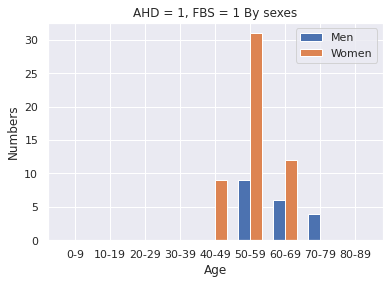

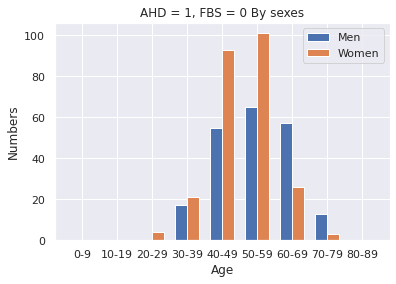

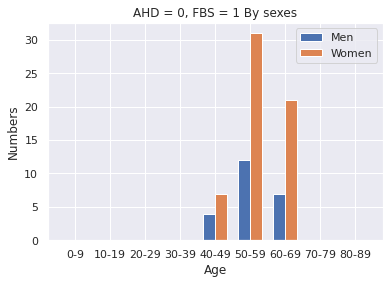

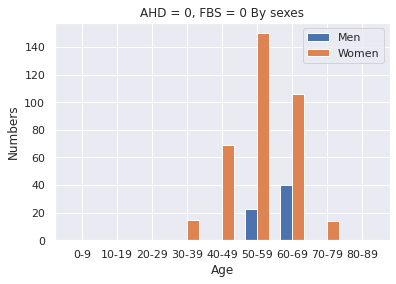

In [70]:
from pandas.core.frame import DataFrame
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv 

column_names = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","target"]
df = pd.read_csv("/content/heart.csv",names=column_names)
tar_arr = df.target.to_list()
tar_arr.pop(0)

age_arr = df.age.to_list()
age_arr.pop(0)

sex_arr = df.sex.to_list()
sex_arr.pop(0)

fbs_arr = df.fbs.to_list()
fbs_arr.pop(0)

man_fbs_arr = []
man_fbs_age_arr = []

man_fbs0_arr = []
man_fbs0_age_arr = []

man_tar0_fbs_arr = []
man_tar0_fbs_age_arr = []

man_tar0_fbs0_arr = []
man_tar0_fbs0_age_arr = []

woman_fbs_arr = []
woman_fbs_age_arr = []

woman_fbs0_arr =[]
woman_fbs0_age_arr = []

woman_tar0_fbs_arr = []
woman_tar0_fbs_age_arr = []

woman_tar0_fbs0_arr = []
woman_tar0_fbs0_age_arr = []

tar_fbs_np_arr = []
tar_fbs_age_np_arr = []
tar_fbs0_np_arr = []
tar_fbs0_age_np_arr = []

tar_fbs_arr = []
tar_fbs_age_arr = []
tar_fbs0_arr = []
tar_fbs0_age_arr = []

for i in range(len(fbs_arr)):
  if tar_arr[i] =='1':
    if fbs_arr[i] == '1':
      if sex_arr[i] == '1': # fbs 1 tar 1 sex 1
        man_fbs_arr.append(int(fbs_arr[i]))
        man_fbs_age_arr.append(int(age_arr[i]))
      else:
        woman_fbs_arr.append(int(fbs_arr[i]))
        woman_fbs_age_arr.append(int(age_arr[i]))
    else:
      if sex_arr[i] == '1': # fbs 1 tar 1 sex 0
        man_fbs0_arr.append(int(fbs_arr[i]))
        man_fbs0_age_arr.append(int(age_arr[i]))
      else:
        woman_fbs0_arr.append(int(fbs_arr[i]))
        woman_fbs0_age_arr.append(int(age_arr[i]))   
  else:
    if fbs_arr[i] == '1': 
      if sex_arr[i] == '1': # fbs 1 tar 0 sex 1
        man_tar0_fbs_arr.append(int(fbs_arr[i]))
        man_tar0_fbs_age_arr.append(int(age_arr[i]))

      else:  # fbs 1 tar 0 sex 0
        woman_tar0_fbs_arr.append(int(fbs_arr[i]))
        woman_tar0_fbs_age_arr.append(int(age_arr[i]))

    else: # fbs 0 tar 0 sex 1
      if sex_arr[i] == '1': # fbs 0 tar 0 sex 1
        man_tar0_fbs0_arr.append(int(fbs_arr[i]))
        man_tar0_fbs0_age_arr.append(int(age_arr[i]))

      else:  # fbs 0 tar 0 sex 0
        woman_tar0_fbs0_arr.append(int(fbs_arr[i]))
        woman_tar0_fbs0_age_arr.append(int(age_arr[i]))



zero_arr_ahd_fbs = []
zero_arr_ahd_fbs0 = []
zero_arr_ahd0_fbs = []
zero_arr_ahd0_fbs0 = []

zero_arrman_ahd_fbs = []
zero_arrman_ahd_fbs0 = []
zero_arrman_ahd0_fbs = []
zero_arrman_ahd0_fbs0 = []

zero_tar0_arr_ahd_fbs = []
zero_tar0_arr_ahd_fbs0 = []
zero_tar0_arr_ahd0_fbs = []
zero_tar0_arr_ahd0_fbs0 = []

zero_tar0_arrman_ahd_fbs = []
zero_tar0_arrman_ahd_fbs0 = []
zero_tar0_arrman_ahd0_fbs = []
zero_tar0_arrman_ahd0_fbs0 = []

for i in range(100):
  zero_arr_ahd_fbs.append(0) 
  zero_arr_ahd_fbs0.append(0)
  zero_arr_ahd0_fbs.append(0) 
  zero_arr_ahd0_fbs0.append(0)

  zero_arrman_ahd_fbs.append(0) 
  zero_arrman_ahd_fbs0.append(0)
  zero_arrman_ahd0_fbs.append(0) 
  zero_arrman_ahd0_fbs0.append(0)

  zero_tar0_arr_ahd_fbs.append(0) 
  zero_tar0_arr_ahd_fbs0.append(0)
  zero_tar0_arr_ahd0_fbs.append(0) 
  zero_tar0_arr_ahd0_fbs0.append(0)

  zero_tar0_arrman_ahd_fbs.append(0) 
  zero_tar0_arrman_ahd_fbs0.append(0)
  zero_tar0_arrman_ahd0_fbs.append(0) 
  zero_tar0_arrman_ahd0_fbs0.append(0)
  


for element in range(100):
  if element in woman_fbs_age_arr:
    zero_arr_ahd_fbs[element] = woman_fbs_age_arr.count(element)
  if element in man_fbs_age_arr:
    zero_arrman_ahd_fbs[element] = man_fbs_age_arr.count(element)

for element in range(100):
  if element in woman_fbs0_age_arr:
    zero_arr_ahd_fbs0[element] = woman_fbs0_age_arr.count(element)
  if element in man_fbs0_age_arr:
    zero_arrman_ahd_fbs0[element] = man_fbs0_age_arr.count(element)    

for element in range(100):
  if element in woman_tar0_fbs_age_arr:
    zero_arr_ahd0_fbs[element] = woman_tar0_fbs_age_arr.count(element)
  if element in man_tar0_fbs_age_arr:
    zero_arrman_ahd0_fbs[element] = man_tar0_fbs_age_arr.count(element)

for element in range(100):
  if element in woman_tar0_fbs0_age_arr:
    zero_arr_ahd0_fbs0[element] = woman_tar0_fbs0_age_arr.count(element)
  if element in man_tar0_fbs0_age_arr:
    zero_arrman_ahd0_fbs0[element] = man_tar0_fbs0_age_arr.count(element)

zero_arr_ahd_fbs_sum = []
zero_arr_ahd_fbs0_sum = []
zero_arr_ahd0_fbs_sum = []
zero_arr_ahd0_fbs0_sum = []

zero_arrman_ahd_fbs_sum = []
zero_arrman_ahd_fbs0_sum = []
zero_arrman_ahd0_fbs_sum = []
zero_arrman_ahd0_fbs0_sum = []

for i in range(1,10):
  zero_arr_ahd_fbs_sum.append(sum(zero_arr_ahd_fbs[10*i-10:10*i]))
  zero_arrman_ahd_fbs_sum.append(sum(zero_arrman_ahd_fbs[10*i-10:10*i]))

for i in range(1,10):
  zero_arr_ahd_fbs0_sum.append(sum(zero_arr_ahd_fbs0[10*i-10:10*i]))
  zero_arrman_ahd_fbs0_sum.append(sum(zero_arrman_ahd_fbs0[10*i-10:10*i]))
  
for i in range(1,10):
  zero_arr_ahd0_fbs_sum.append(sum(zero_arr_ahd0_fbs[10*i-10:10*i]))
  zero_arrman_ahd0_fbs_sum.append(sum(zero_arrman_ahd0_fbs[10*i-10:10*i]))

for i in range(1,10):
  zero_arr_ahd0_fbs0_sum.append(sum(zero_arr_ahd0_fbs0[10*i-10:10*i]))
  zero_arrman_ahd0_fbs0_sum.append(sum(zero_arrman_ahd0_fbs0[10*i-10:10*i]))

N = 9
ind = np.arange(N) 
width = 0.35
# AHD = 1, FBS = 1 By sexes      
plt.bar(ind, zero_arr_ahd_fbs_sum, width, label='Men')
plt.bar(ind + width, zero_arrman_ahd_fbs_sum, width, label='Women')
plt.xlabel('Age')
plt.ylabel('Numbers')
plt.title('AHD = 1, FBS = 1 By sexes')

plt.xticks(ind + width / 2, ("0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89"))
plt.legend(loc='best')
plt.show()
# AHD = 1, FBS = 0 By sexes
plt.bar(ind, zero_arr_ahd_fbs0_sum, width, label='Men')
plt.bar(ind + width, zero_arrman_ahd_fbs0_sum, width, label='Women')
plt.xlabel('Age')
plt.ylabel('Numbers')
plt.title('AHD = 1, FBS = 0 By sexes')

plt.xticks(ind + width / 2, ("0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89"))
plt.legend(loc='best')
plt.show()
# AHD = 0, FBS = 0 By sexes
plt.bar(ind, zero_arr_ahd0_fbs_sum, width, label='Men')
plt.bar(ind + width, zero_arrman_ahd0_fbs_sum, width, label='Women')
plt.xlabel('Age')
plt.ylabel('Numbers')
plt.title('AHD = 0, FBS = 1 By sexes')

plt.xticks(ind + width / 2, ("0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89"))
plt.legend(loc='best')
plt.show()
# AHD = 0, FBS = 0 By sexes
plt.bar(ind, zero_arr_ahd0_fbs0_sum, width, label='Men')
plt.bar(ind + width, zero_arrman_ahd0_fbs0_sum, width, label='Women')
plt.xlabel('Age')
plt.ylabel('Numbers')
plt.title('AHD = 0, FBS = 0 By sexes')

plt.xticks(ind + width / 2, ("0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89"))
plt.legend(loc='best')
plt.show()





#----------------------------------------------------------------------------------------------------------------

**When the first of our 4 graphs in this section is examined, our first graph reveals the situation where AHD and FBS are 1. The age groups of our data in this group are between 40-79. We do not have any male data in the 40-49 age group. After that, the female population progresses at a higher rate up to the age range of 70-79 compared to the males. No female data were found in this range. Our second graph shows the case where AHD is 1 and FBS is 0. In this graph, the ratio of both men and women increases from the age group of 30-39 to the age range of 50-59 and then decreases. 3. Our chart is for the case where AHD has 0 FBS. The data set included in this chart is less compared to the second chart. Throughout the graph, the proportion of women is higher than that of men. Our last graph is for the case where both AHD and FBS are 0. In this graph, only male individuals between the ages of 50-69 are encountered, and the rate of females included in the group is much higher than males.**

#----------------------------------------------------------------------------------------------------------------

#ChestPain and All Attributes

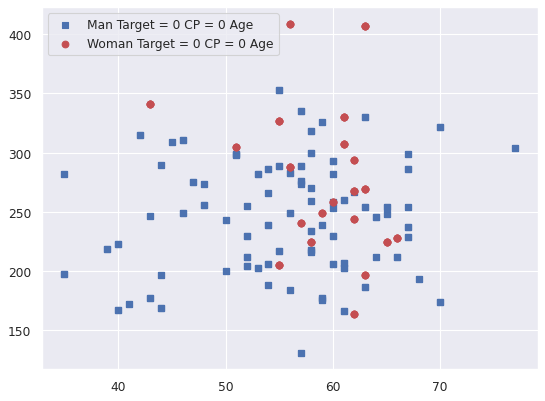

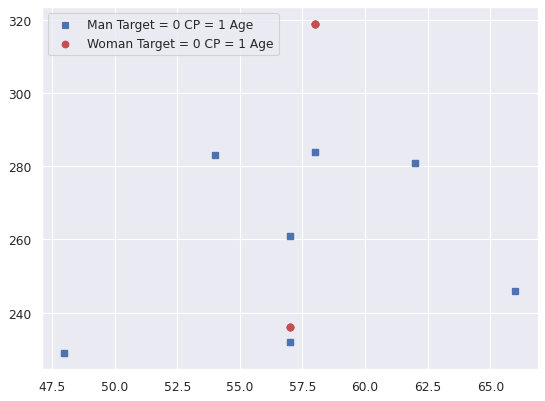

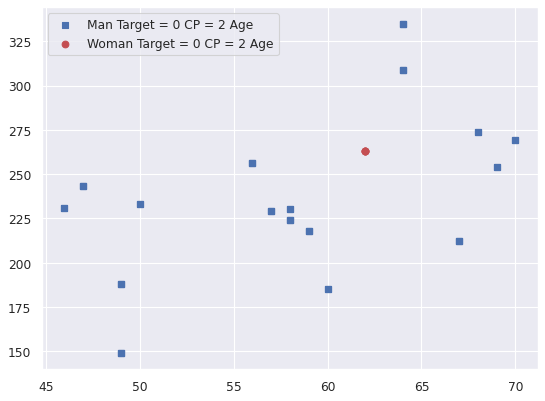

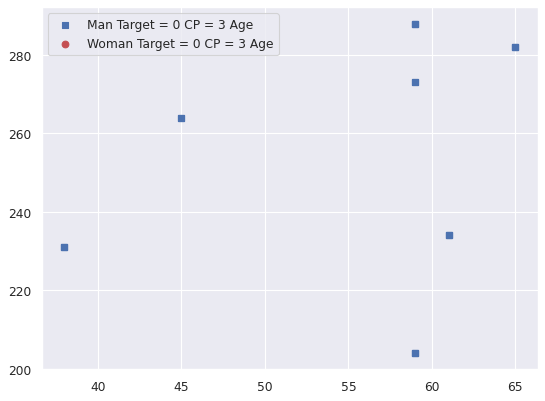

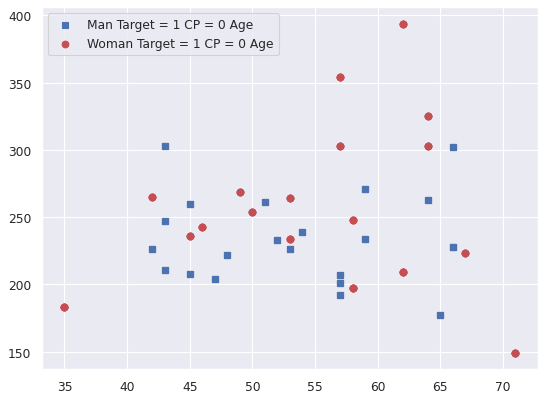

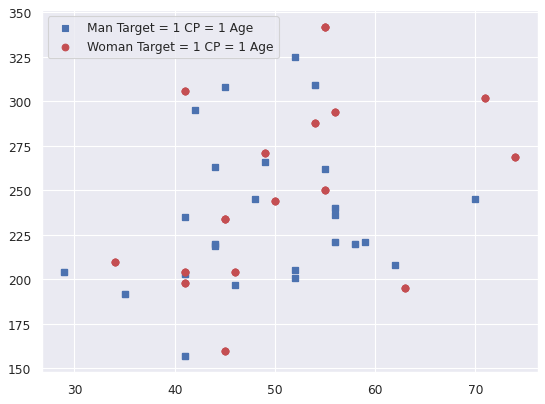

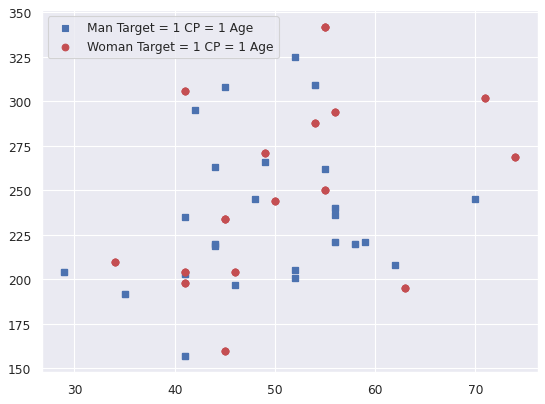

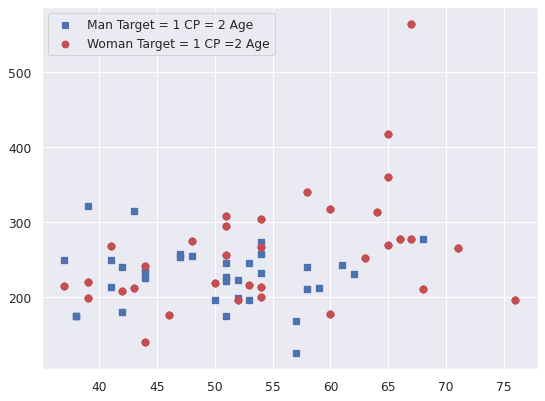

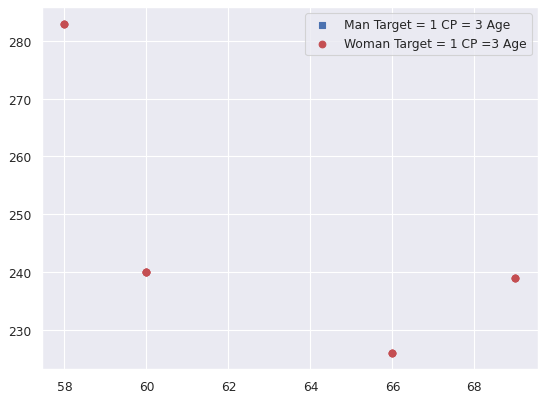

In [71]:
from pandas.core.frame import DataFrame
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv 
column_names = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","target"]
df = pd.read_csv("/content/heart.csv",names=column_names)

cp_arr = df.cp.to_list()
cp_arr.pop(0)

tar_arr = df.target.to_list()
tar_arr.pop(0)

age_arr = df.age.to_list()
age_arr.pop(0)

sex_arr = df.sex.to_list()
sex_arr.pop(0)

chol_arr = df.chol.to_list()
chol_arr.pop(0)

fbs_arr = df.fbs.to_list()
fbs_arr.pop(0)

exang_arr = df.exang.to_list()
exang_arr.pop(0)

man_tar1_cp0_age_arr = []
man_tar1_cp0_chol_arr = []
man_tar1_cp0_exang0_arr = []
man_tar1_cp0_exang0_age_arr = []
man_tar1_cp0_exang1_arr = []
man_tar1_cp0_exang1_age_arr = []
man_tar1_cp0_fbs0_arr = []
man_tar1_cp0_fbs0_age_arr = []
man_tar1_cp0_fbs1_arr = []
man_tar1_cp0_fbs1_age_arr = []

man_tar1_cp1_age_arr = []
man_tar1_cp1_chol_arr = []
man_tar1_cp1_exang0_arr = []
man_tar1_cp1_exang0_age_arr = []
man_tar1_cp1_exang1_arr = []
man_tar1_cp1_exang1_age_arr = []
man_tar1_cp1_fbs0_arr = []
man_tar1_cp1_fbs0_age_arr = []
man_tar1_cp1_fbs1_arr = []
man_tar1_cp1_fbs1_age_arr = []

man_tar1_cp2_age_arr = []
man_tar1_cp2_chol_arr = []
man_tar1_cp2_exang0_arr = []
man_tar1_cp2_exang0_age_arr = []
man_tar1_cp2_exang1_arr = []
man_tar1_cp2_exang1_age_arr = []
man_tar1_cp2_fbs0_arr = []
man_tar1_cp2_fbs0_age_arr = []
man_tar1_cp2_fbs1_arr = []
man_tar1_cp2_fbs1_age_arr = []

man_tar1_cp3_age_arr = []
man_tar1_cp3_chol_arr = []
man_tar1_cp3_exang0_arr = []
man_tar1_cp3_exang0_age_arr = []
man_tar1_cp3_exang1_arr = []
man_tar1_cp3_exang1_age_arr = []
man_tar1_cp3_fbs0_arr = []
man_tar1_cp3_fbs0_age_arr = []
man_tar1_cp3_fbs1_arr = []
man_tar1_cp3_fbs1_age_arr = []

man_tar0_cp0_age_arr = []
man_tar0_cp0_chol_arr = []
man_tar0_cp0_exang0_arr = []
man_tar0_cp0_exang0_age_arr = []
man_tar0_cp0_exang1_arr = []
man_tar0_cp0_exang1_age_arr = []
man_tar0_cp0_fbs0_arr = []
man_tar0_cp0_fbs0_age_arr = []
man_tar0_cp0_fbs1_arr = []
man_tar0_cp0_fbs1_age_arr = []

man_tar0_cp1_age_arr = []
man_tar0_cp1_chol_arr = []
man_tar0_cp1_exang0_arr = []
man_tar0_cp1_exang0_age_arr = []
man_tar0_cp1_exang1_arr = []
man_tar0_cp1_exang1_age_arr = []
man_tar0_cp1_fbs0_arr = []
man_tar0_cp1_fbs0_age_arr = []
man_tar0_cp1_fbs1_arr = []
man_tar0_cp1_fbs1_age_arr = []

man_tar0_cp2_age_arr = []
man_tar0_cp2_chol_arr = []
man_tar0_cp2_exang0_arr = []
man_tar0_cp2_exang0_age_arr = []
man_tar0_cp2_exang1_arr = []
man_tar0_cp2_exang1_age_arr = []
man_tar0_cp2_fbs0_arr = []
man_tar0_cp2_fbs0_age_arr = []
man_tar0_cp2_fbs1_arr = []
man_tar0_cp2_fbs1_age_arr = []

man_tar0_cp3_age_arr = []
man_tar0_cp3_chol_arr = []
man_tar0_cp3_exang0_arr = []
man_tar0_cp3_exang0_age_arr = []
man_tar0_cp3_exang1_arr = []
man_tar0_cp3_exang1_age_arr = []
man_tar0_cp3_fbs0_arr = []
man_tar0_cp3_fbs0_age_arr = []
man_tar0_cp3_fbs1_arr = []
man_tar0_cp3_fbs1_age_arr = []




woman_tar1_cp0_age_arr = []
woman_tar1_cp0_chol_arr = []
woman_tar1_cp0_exang0_arr = []
woman_tar1_cp0_exang0_age_arr = []
woman_tar1_cp0_exang1_arr = []
woman_tar1_cp0_exang1_age_arr = []
woman_tar1_cp0_fbs0_arr = []
woman_tar1_cp0_fbs0_age_arr = []
woman_tar1_cp0_fbs1_arr = []
woman_tar1_cp0_fbs1_age_arr = []

woman_tar1_cp1_age_arr = []
woman_tar1_cp1_chol_arr = []
woman_tar1_cp1_exang0_arr = []
woman_tar1_cp1_exang0_age_arr = []
woman_tar1_cp1_exang1_arr = []
woman_tar1_cp1_exang1_age_arr = []
woman_tar1_cp1_fbs0_arr = []
woman_tar1_cp1_fbs0_age_arr = []
woman_tar1_cp1_fbs1_arr = []
woman_tar1_cp1_fbs1_age_arr = []

woman_tar1_cp2_age_arr = []
woman_tar1_cp2_chol_arr = []
woman_tar1_cp2_exang0_arr = []
woman_tar1_cp2_exang0_age_arr = []
woman_tar1_cp2_exang1_arr = []
woman_tar1_cp2_exang1_age_arr = []
woman_tar1_cp2_fbs0_arr = []
woman_tar1_cp2_fbs0_age_arr = []
woman_tar1_cp2_fbs1_arr = []
woman_tar1_cp2_fbs1_age_arr = []

woman_tar1_cp3_age_arr = []
woman_tar1_cp3_chol_arr = []
woman_tar1_cp3_exang0_arr = []
woman_tar1_cp3_exang0_age_arr = []
woman_tar1_cp3_exang1_arr = []
woman_tar1_cp3_exang1_age_arr = []
woman_tar1_cp3_fbs0_arr = []
woman_tar1_cp3_fbs0_age_arr = []
woman_tar1_cp3_fbs1_arr = []
woman_tar1_cp3_fbs1_age_arr = []

woman_tar0_cp0_age_arr = []
woman_tar0_cp0_chol_arr = []
woman_tar0_cp0_exang0_arr = []
woman_tar0_cp0_exang0_age_arr = []
woman_tar0_cp0_exang1_arr = []
woman_tar0_cp0_exang1_age_arr = []
woman_tar0_cp0_fbs0_arr = []
woman_tar0_cp0_fbs0_age_arr = []
woman_tar0_cp0_fbs1_arr = []
woman_tar0_cp0_fbs1_age_arr = []

woman_tar0_cp1_age_arr = []
woman_tar0_cp1_chol_arr = []
woman_tar0_cp1_exang0_arr = []
woman_tar0_cp1_exang0_age_arr = []
woman_tar0_cp1_exang1_arr = []
woman_tar0_cp1_exang1_age_arr = []
woman_tar0_cp1_fbs0_arr = []
woman_tar0_cp1_fbs0_age_arr = []
woman_tar0_cp1_fbs1_arr = []
woman_tar0_cp1_fbs1_age_arr = []

woman_tar0_cp2_age_arr = []
woman_tar0_cp2_chol_arr = []
woman_tar0_cp2_exang0_arr = []
woman_tar0_cp2_exang0_age_arr = []
woman_tar0_cp2_exang1_arr = []
woman_tar0_cp2_exang1_age_arr = []
woman_tar0_cp2_fbs0_arr = []
woman_tar0_cp2_fbs0_age_arr = []
woman_tar0_cp2_fbs1_arr = []
woman_tar0_cp2_fbs1_age_arr = []

woman_tar0_cp3_age_arr = []
woman_tar0_cp3_chol_arr = []
woman_tar0_cp3_exang0_arr = []
woman_tar0_cp3_exang0_age_arr = []
woman_tar0_cp3_exang1_arr = []
woman_tar0_cp3_exang1_age_arr = []
woman_tar0_cp3_fbs0_arr = []
woman_tar0_cp3_fbs0_age_arr = []
woman_tar0_cp3_fbs1_arr = []
woman_tar0_cp3_fbs1_age_arr = []


for i in range(len(cp_arr)):
  if sex_arr[i] == '1':

    if tar_arr[i] == '1':

      if cp_arr[i] == '0': #tar = 1 cp = 0 man
        man_tar1_cp0_age_arr.append(int(age_arr[i]))
        man_tar1_cp0_chol_arr.append(int(chol_arr[i]))
        if exang_arr[i] == '0':
          man_tar1_cp0_exang0_arr.append(int(exang_arr[i]))
          man_tar1_cp0_exang0_age_arr.append(int(age_arr[i]))
        elif exang_arr[i] == '1':
          man_tar1_cp0_exang1_arr.append(int(exang_arr[i]))
          man_tar1_cp0_exang1_age_arr.append(int(age_arr[i]))
        if fbs_arr[i] == '0':
          man_tar1_cp0_fbs0_arr.append(int(fbs_arr[i]))
          man_tar1_cp0_fbs0_age_arr.append(int(age_arr[i]))
        elif fbs_arr[i] == '1':
          man_tar1_cp0_fbs1_arr.append(int(fbs_arr[i]))
          man_tar1_cp0_fbs1_age_arr.append(int(age_arr[i]))

      elif cp_arr[i] == '1': #tar = 1 cp = 1 man 
        man_tar1_cp1_age_arr.append(int(age_arr[i]))
        man_tar1_cp1_chol_arr.append(int(chol_arr[i]))
        if exang_arr[i] == '0':
          man_tar1_cp1_exang0_arr.append(int(exang_arr[i]))
          man_tar1_cp1_exang0_age_arr.append(int(age_arr[i]))
        elif exang_arr[i] == '1':
          man_tar1_cp1_exang1_arr.append(int(exang_arr[i]))
          man_tar1_cp1_exang1_age_arr.append(int(age_arr[i]))
        if fbs_arr[i] == '0':
          man_tar1_cp1_fbs0_arr.append(int(fbs_arr[i]))
          man_tar1_cp1_fbs0_age_arr.append(int(age_arr[i]))
        elif fbs_arr[i] == '1':
          man_tar1_cp1_fbs1_arr.append(int(fbs_arr[i]))
          man_tar1_cp1_fbs1_age_arr.append(int(age_arr[i]))

      elif cp_arr[i] == '2': #tar = 1 cp = 2 man
        man_tar1_cp2_age_arr.append(int(age_arr[i]))
        man_tar1_cp2_chol_arr.append(int(chol_arr[i]))
        if exang_arr[i] == '0':
          man_tar1_cp2_exang0_arr.append(int(exang_arr[i]))
          man_tar1_cp2_exang0_age_arr.append(int(age_arr[i]))
        elif exang_arr[i] == '1':
          man_tar1_cp2_exang1_arr.append(int(exang_arr[i]))
          man_tar1_cp2_exang1_age_arr.append(int(age_arr[i]))
        if fbs_arr[i] == '0':
          man_tar1_cp2_fbs0_arr.append(int(fbs_arr[i]))
          man_tar1_cp2_fbs0_age_arr.append(int(age_arr[i]))
        elif fbs_arr[i] == '1':
          man_tar1_cp2_fbs1_arr.append(int(fbs_arr[i]))
          man_tar1_cp2_fbs1_age_arr.append(int(age_arr[i]))

      elif cp_arr[i] == 3: #tar = 1 cp = 3 man
        man_tar1_cp3_age_arr.append(int(age_arr[i]))
        man_tar1_cp3_chol_arr.append(int(chol_arr[i]))
        if exang_arr[i] == '0':
          man_tar1_cp3_exang0_arr.append(int(exang_arr[i]))
          man_tar1_cp3_exang0_age_arr.append(int(age_arr[i]))
        elif exang_arr[i] == '1':
          man_tar1_cp3_exang1_arr.append(int(exang_arr[i]))
          man_tar1_cp3_exang1_age_arr.append(int(age_arr[i]))
        if fbs_arr[i] == '0':
          man_tar1_cp3_fbs0_arr.append(int(fbs_arr[i]))
          man_tar1_cp3_fbs0_age_arr.append(int(age_arr[i]))
        elif fbs_arr[i] == '1':
          man_tar1_cp3_fbs1_arr.append(int(fbs_arr[i]))
          man_tar1_cp3_fbs1_age_arr.append(int(age_arr[i]))
    else:
      if cp_arr[i] == '0': #tar = 0 cp = 0 man
        man_tar0_cp0_age_arr.append(int(age_arr[i]))
        man_tar0_cp0_chol_arr.append(int(chol_arr[i]))
        if exang_arr[i] == '0':
          man_tar0_cp0_exang0_arr.append(int(exang_arr[i]))
          man_tar0_cp0_exang0_age_arr.append(int(age_arr[i]))
        elif exang_arr[i] == '1':
          man_tar0_cp0_exang1_arr.append(int(exang_arr[i]))
          man_tar0_cp0_exang1_age_arr.append(int(age_arr[i]))
        if fbs_arr[i] == '0':
          man_tar0_cp0_fbs0_arr.append(int(fbs_arr[i]))
          man_tar0_cp0_fbs0_age_arr.append(int(age_arr[i]))
        elif fbs_arr[i] == '1':
          man_tar0_cp0_fbs1_arr.append(int(fbs_arr[i]))
          man_tar0_cp0_fbs1_age_arr.append(int(age_arr[i]))

      elif cp_arr[i] == '1': #tar = 1 cp = 1 man 
        man_tar0_cp1_age_arr.append(int(age_arr[i]))
        man_tar0_cp1_chol_arr.append(int(chol_arr[i]))
        if exang_arr[i] == '0':
          man_tar0_cp1_exang0_arr.append(int(exang_arr[i]))
          man_tar0_cp1_exang0_age_arr.append(int(age_arr[i]))
        elif exang_arr[i] == '1':
          man_tar0_cp1_exang1_arr.append(int(exang_arr[i]))
          man_tar0_cp1_exang1_age_arr.append(int(age_arr[i]))
        if fbs_arr[i] == '0':
          man_tar0_cp1_fbs0_arr.append(int(fbs_arr[i]))
          man_tar0_cp1_fbs0_age_arr.append(int(age_arr[i]))
        elif fbs_arr[i] == '1':
          man_tar0_cp1_fbs1_arr.append(int(fbs_arr[i]))
          man_tar0_cp1_fbs1_age_arr.append(int(age_arr[i]))

      elif cp_arr[i] == '2': #tar = 0 cp = 2 man
        man_tar0_cp2_age_arr.append(int(age_arr[i]))
        man_tar0_cp2_chol_arr.append(int(chol_arr[i]))
        if exang_arr[i] == '0':
          man_tar0_cp2_exang0_arr.append(int(exang_arr[i]))
          man_tar0_cp2_exang0_age_arr.append(int(age_arr[i]))
        elif exang_arr[i] == '1':
          man_tar0_cp2_exang1_arr.append(int(exang_arr[i]))
          man_tar0_cp2_exang1_age_arr.append(int(age_arr[i]))
        if fbs_arr[i] == '0':
          man_tar0_cp2_fbs0_arr.append(int(fbs_arr[i]))
          man_tar0_cp2_fbs0_age_arr.append(int(age_arr[i]))
        elif fbs_arr[i] == '1':
          man_tar0_cp2_fbs1_arr.append(int(fbs_arr[i]))
          man_tar0_cp2_fbs1_age_arr.append(int(age_arr[i]))

      elif cp_arr[i] == '3': #tar = 0 cp = 3 man
        man_tar0_cp3_age_arr.append(int(age_arr[i]))
        man_tar0_cp3_chol_arr.append(int(chol_arr[i]))
        if exang_arr[i] == '0':
          man_tar0_cp3_exang0_arr.append(int(exang_arr[i]))
          man_tar0_cp3_exang0_age_arr.append(int(age_arr[i]))
        elif exang_arr[i] == '1':
          man_tar0_cp3_exang1_arr.append(int(exang_arr[i]))
          man_tar0_cp3_exang1_age_arr.append(int(age_arr[i]))
        if fbs_arr[i] == '0':
          man_tar0_cp3_fbs0_arr.append(int(fbs_arr[i]))
          man_tar0_cp3_fbs0_age_arr.append(int(age_arr[i]))
        elif fbs_arr[i] == '1':
          man_tar0_cp3_fbs1_arr.append(int(fbs_arr[i]))
          man_tar0_cp3_fbs1_age_arr.append(int(age_arr[i]))
  else:
    if tar_arr[i] == '1':

      if cp_arr[i] == '0': #tar = 1 cp = 0 woman
        woman_tar1_cp0_age_arr.append(int(age_arr[i]))
        woman_tar1_cp0_chol_arr.append(int(chol_arr[i]))
        if exang_arr[i] == '0':
          woman_tar1_cp0_exang0_arr.append(int(exang_arr[i]))
          woman_tar1_cp0_exang0_age_arr.append(int(age_arr[i]))
        elif exang_arr[i] == '1':
          woman_tar1_cp0_exang1_arr.append(int(exang_arr[i]))
          woman_tar1_cp0_exang1_age_arr.append(int(age_arr[i]))
        if fbs_arr[i] == '0':
          woman_tar1_cp0_fbs0_arr.append(int(fbs_arr[i]))
          woman_tar1_cp0_fbs0_age_arr.append(int(age_arr[i]))
        elif fbs_arr[i] == '1':
          woman_tar1_cp0_fbs1_arr.append(int(fbs_arr[i]))
          woman_tar1_cp0_fbs1_age_arr.append(int(age_arr[i]))

      elif cp_arr[i] == '1': #tar = 1 cp = 1 woman 
        woman_tar1_cp1_age_arr.append(int(age_arr[i]))
        woman_tar1_cp1_chol_arr.append(int(chol_arr[i]))
        if exang_arr[i] == '0':
          woman_tar1_cp1_exang0_arr.append(int(exang_arr[i]))
          woman_tar1_cp1_exang0_age_arr.append(int(age_arr[i]))
        elif exang_arr[i] == '1':
          woman_tar1_cp1_exang1_arr.append(int(exang_arr[i]))
          woman_tar1_cp1_exang1_age_arr.append(int(age_arr[i]))
        if fbs_arr[i] == '0':
          woman_tar1_cp1_fbs0_arr.append(int(fbs_arr[i]))
          woman_tar1_cp1_fbs0_age_arr.append(int(age_arr[i]))
        elif fbs_arr[i] == '1':
          woman_tar1_cp1_fbs1_arr.append(int(fbs_arr[i]))
          woman_tar1_cp1_fbs1_age_arr.append(int(age_arr[i]))

      elif cp_arr[i] == '2': #tar = 1 cp = 2 woman
        woman_tar1_cp2_age_arr.append(int(age_arr[i]))
        woman_tar1_cp2_chol_arr.append(int(chol_arr[i]))
        if exang_arr[i] == '0':
          woman_tar1_cp2_exang0_arr.append(int(exang_arr[i]))
          woman_tar1_cp2_exang0_age_arr.append(int(age_arr[i]))
        elif exang_arr[i] == '1':
          woman_tar1_cp2_exang1_arr.append(int(exang_arr[i]))
          woman_tar1_cp2_exang1_age_arr.append(int(age_arr[i]))
        if fbs_arr[i] == '0':
          woman_tar1_cp2_fbs0_arr.append(int(fbs_arr[i]))
          woman_tar1_cp2_fbs0_age_arr.append(int(age_arr[i]))
        elif fbs_arr[i] == '1':
          woman_tar1_cp2_fbs1_arr.append(int(fbs_arr[i]))
          woman_tar1_cp2_fbs1_age_arr.append(int(age_arr[i]))

      elif cp_arr[i] == '3': #tar = 1 cp = 3 woman
        woman_tar1_cp3_age_arr.append(int(age_arr[i]))
        woman_tar1_cp3_chol_arr.append(int(chol_arr[i]))
        if exang_arr[i] == '0':
          woman_tar1_cp3_exang0_arr.append(int(exang_arr[i]))
          woman_tar1_cp3_exang0_age_arr.append(int(age_arr[i]))
        elif exang_arr[i] == '1':
          woman_tar1_cp3_exang1_arr.append(int(exang_arr[i]))
          woman_tar1_cp3_exang1_age_arr.append(int(age_arr[i]))
        if fbs_arr[i] == '0':
          woman_tar1_cp3_fbs0_arr.append(int(fbs_arr[i]))
          woman_tar1_cp3_fbs0_age_arr.append(int(age_arr[i]))
        elif fbs_arr[i] == '1':
          woman_tar1_cp3_fbs1_arr.append(int(fbs_arr[i]))
          woman_tar1_cp3_fbs1_age_arr.append(int(age_arr[i]))
    else:
      if cp_arr[i] == '0': #tar = 0 cp = 0 woman
        woman_tar0_cp0_age_arr.append(int(age_arr[i]))
        woman_tar0_cp0_chol_arr.append(int(chol_arr[i]))
        if exang_arr[i] == '0':
          woman_tar0_cp0_exang0_arr.append(int(exang_arr[i]))
          woman_tar0_cp0_exang0_age_arr.append(int(age_arr[i]))
        elif exang_arr[i] == '1':
          woman_tar0_cp0_exang1_arr.append(int(exang_arr[i]))
          woman_tar0_cp0_exang1_age_arr.append(int(age_arr[i]))
        if fbs_arr[i] == '0':
          woman_tar0_cp0_fbs0_arr.append(int(fbs_arr[i]))
          woman_tar0_cp0_fbs0_age_arr.append(int(age_arr[i]))
        elif fbs_arr[i] == '1':
          woman_tar0_cp0_fbs1_arr.append(int(fbs_arr[i]))
          woman_tar0_cp0_fbs1_age_arr.append(int(age_arr[i]))

      elif cp_arr[i] == '1': #tar = 1 cp = 1 woman 
        woman_tar0_cp1_age_arr.append(int(age_arr[i]))
        woman_tar0_cp1_chol_arr.append(int(chol_arr[i]))
        if exang_arr[i] == '0':
          woman_tar0_cp1_exang0_arr.append(int(exang_arr[i]))
          woman_tar0_cp1_exang0_age_arr.append(int(age_arr[i]))
        elif exang_arr[i] == '1':
          woman_tar0_cp1_exang1_arr.append(int(exang_arr[i]))
          woman_tar0_cp1_exang1_age_arr.append(int(age_arr[i]))
        if fbs_arr[i] == '0':
          woman_tar0_cp1_fbs0_arr.append(int(fbs_arr[i]))
          woman_tar0_cp1_fbs0_age_arr.append(int(age_arr[i]))
        elif fbs_arr[i] == '1':
          woman_tar0_cp1_fbs1_arr.append(int(fbs_arr[i]))
          woman_tar0_cp1_fbs1_age_arr.append(int(age_arr[i]))

      elif cp_arr[i] == '2': #tar = 0 cp = 2 woman
        woman_tar0_cp2_age_arr.append(int(age_arr[i]))
        woman_tar0_cp2_chol_arr.append(int(chol_arr[i]))
        if exang_arr[i] == '0':
          woman_tar0_cp2_exang0_arr.append(int(exang_arr[i]))
          woman_tar0_cp2_exang0_age_arr.append(int(age_arr[i]))
        elif exang_arr[i] == '1':
          woman_tar0_cp2_exang1_arr.append(int(exang_arr[i]))
          woman_tar0_cp2_exang1_age_arr.append(int(age_arr[i]))
        if fbs_arr[i] == '0':
          woman_tar0_cp2_fbs0_arr.append(int(fbs_arr[i]))
          woman_tar0_cp2_fbs0_age_arr.append(int(age_arr[i]))
        elif fbs_arr[i] == '1':
          woman_tar0_cp2_fbs1_arr.append(int(fbs_arr[i]))
          woman_tar0_cp2_fbs1_age_arr.append(int(age_arr[i]))

      elif cp_arr[i] == 3: #tar = 0 cp = 3 woman
        woman_tar0_cp3_age_arr.append(int(age_arr[i]))
        woman_tar0_cp3_chol_arr.append(int(chol_arr[i]))
        if exang_arr[i] == '0':
          woman_tar0_cp3_exang0_arr.append(int(exang_arr[i]))
          woman_tar0_cp3_exang0_age_arr.append(int(age_arr[i]))
        elif exang_arr[i] == '1':
          woman_tar0_cp3_exang1_arr.append(int(exang_arr[i]))
          woman_tar0_cp3_exang1_age_arr.append(int(age_arr[i]))
        if fbs_arr[i] == '0':
          woman_tar0_cp3_fbs0_arr.append(int(fbs_arr[i]))
          woman_tar0_cp3_fbs0_age_arr.append(int(age_arr[i]))
        elif fbs_arr[i] == '1':
          woman_tar0_cp3_fbs1_arr.append(int(fbs_arr[i]))
          woman_tar0_cp3_fbs1_age_arr.append(int(age_arr[i]))
######################## 1
fig = plt.figure(figsize=(8, 6), dpi=80)
ax1 = fig.add_subplot(111)

ax1.scatter(man_tar0_cp0_age_arr, man_tar0_cp0_chol_arr, c='b',  marker="s", label='Man Target = 0 CP = 0 Age ')
ax1.scatter(woman_tar0_cp0_age_arr, woman_tar0_cp0_chol_arr, c='r', marker="o", label='Woman Target = 0 CP = 0 Age')

plt.legend(loc='best');
plt.show()
############## 2 
fig = plt.figure(figsize=(8, 6), dpi=80)
ax1 = fig.add_subplot(111)

ax1.scatter(man_tar0_cp1_age_arr, man_tar0_cp1_chol_arr, c='b',  marker="s", label='Man Target = 0 CP = 1 Age ')
ax1.scatter(woman_tar0_cp1_age_arr, woman_tar0_cp1_chol_arr, c='r', marker="o", label='Woman Target = 0 CP = 1 Age')

plt.legend(loc='best');
plt.show()
############## 3
fig = plt.figure(figsize=(8, 6), dpi=80)
ax1 = fig.add_subplot(111)

ax1.scatter(man_tar0_cp2_age_arr, man_tar0_cp2_chol_arr, c='b',  marker="s", label='Man Target = 0 CP = 2 Age ')
ax1.scatter(woman_tar0_cp2_age_arr, woman_tar0_cp2_chol_arr, c='r', marker="o", label='Woman Target = 0 CP = 2 Age')

plt.legend(loc='best');
plt.show()
############## 4
fig = plt.figure(figsize=(8, 6), dpi=80)
ax1 = fig.add_subplot(111)

ax1.scatter(man_tar0_cp3_age_arr, man_tar0_cp3_chol_arr, c='b',  marker="s", label='Man Target = 0 CP = 3 Age ')
ax1.scatter(woman_tar0_cp3_age_arr, woman_tar0_cp3_chol_arr, c='r', marker="o", label='Woman Target = 0 CP = 3 Age')

plt.legend(loc='best');
plt.show()
############## 5
fig = plt.figure(figsize=(8, 6), dpi=80)
ax1 = fig.add_subplot(111)

ax1.scatter(man_tar1_cp0_age_arr, man_tar1_cp0_chol_arr, c='b',  marker="s", label='Man Target = 1 CP = 0 Age ')
ax1.scatter(woman_tar1_cp0_age_arr, woman_tar1_cp0_chol_arr, c='r', marker="o", label='Woman Target = 1 CP = 0 Age')

plt.legend(loc='best');
plt.show()
############## 6
fig = plt.figure(figsize=(8, 6), dpi=80)
ax1 = fig.add_subplot(111)

ax1.scatter(man_tar1_cp1_age_arr, man_tar1_cp1_chol_arr, c='b',  marker="s", label='Man Target = 1 CP = 1 Age ')
ax1.scatter(woman_tar1_cp1_age_arr, woman_tar1_cp1_chol_arr, c='r', marker="o", label='Woman Target = 1 CP = 1 Age')

plt.legend(loc='best');
plt.show()
############## 7
fig = plt.figure(figsize=(8, 6), dpi=80)
ax1 = fig.add_subplot(111)

ax1.scatter(man_tar1_cp1_age_arr, man_tar1_cp1_chol_arr, c='b',  marker="s", label='Man Target = 1 CP = 1 Age ')
ax1.scatter(woman_tar1_cp1_age_arr, woman_tar1_cp1_chol_arr, c='r', marker="o", label='Woman Target = 1 CP = 1 Age')

plt.legend(loc='best');
plt.show()
############## 8
fig = plt.figure(figsize=(8, 6), dpi=80)
ax1 = fig.add_subplot(111)

ax1.scatter(man_tar1_cp2_age_arr, man_tar1_cp2_chol_arr, c='b',  marker="s", label='Man Target = 1 CP = 2 Age ')
ax1.scatter(woman_tar1_cp2_age_arr, woman_tar1_cp2_chol_arr, c='r', marker="o", label='Woman Target = 1 CP =2 Age')

plt.legend(loc='best');
plt.show()

############## 9
fig = plt.figure(figsize=(8, 6), dpi=80)
ax1 = fig.add_subplot(111)

ax1.scatter(man_tar1_cp3_age_arr, man_tar1_cp3_chol_arr, c='b',  marker="s", label='Man Target = 1 CP = 3 Age ')
ax1.scatter(woman_tar1_cp3_age_arr, woman_tar1_cp3_chol_arr, c='r', marker="o", label='Woman Target = 1 CP =3 Age')

plt.legend(loc='best');
plt.show()


#**MACHINE LEARNING**

#Random Forest & Logistic

**We used random forest classification and logistic regression algorithms. We achieved a remarkable 97% accuracy rate from the random forest algorithm. We obtained an accuracy rate of 77% from the logistic regression algorithm.**

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
data = pd.read_csv("heart.csv")
data.head()
#Exploring the data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [74]:
X = data.iloc[:,:4].values #Selecting necessary columns which means first four columns
y = data.iloc[:,-1].values #Selecting target column

In [75]:
#Splitting dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [76]:
#Creating and training logistic regression model
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state = 0)
model_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [77]:
#Creating and training random forest model
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [78]:
#Testing models
from sklearn.metrics import accuracy_score

lr_predictions = model_lr.predict(X_test) #Predicts the results corresponding to given test data
lr_acc = accuracy_score(y_test, lr_predictions) #y_test-> actual data, lr_predictions-> results given by model. Compares them and calculates accuracy.

rf_predictions = model_rf.predict(X_test) #Same thing as above
rf_acc = accuracy_score(y_test, rf_predictions)

print("Logistic Regression Accuracy:"+str(lr_acc))
print("Random Forest Accuracy:"+str(rf_acc))

Logistic Regression Accuracy:0.77431906614786
Random Forest Accuracy:0.9727626459143969


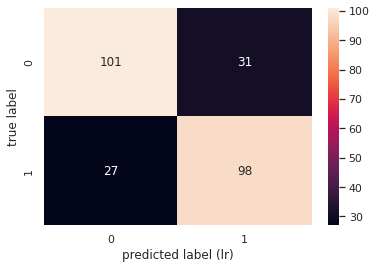

In [79]:
#Linear regression 
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()
mat = confusion_matrix(y_test, lr_predictions)
sns.heatmap(mat, annot=True, fmt='d')
plt.xlabel('predicted label (lr)')
plt.ylabel('true label');

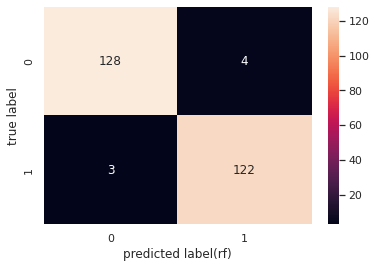

In [80]:
#Random Forest
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()
mat = confusion_matrix(y_test, rf_predictions)
sns.heatmap(mat, annot=True, fmt='d')
plt.xlabel('predicted label(rf)')
plt.ylabel('true label');

#KNN (K Nearest Neighbor)

**We used the simple k-Nearest-Neighbor algorithm. We tried the n parameter between 1 and 20 and interestingly we found this n value 1. We achieved an accuracy of 98 percent with the best n value "1"**

In [81]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [82]:
data = pd.read_csv("heart.csv")

In [83]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [84]:
X = data.iloc[:, :4] #Selecting necessary columns for the model (first 4 columns)
y = data.iloc[:, -1] #Selecting "target" column

In [85]:
#Splitting dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.25, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42) # %12.5 for test, %12.5 for validation

In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score  

max_acc = 0 #Used to find the model with highest accuracy
best_n = 0 #Used to find best performing number of neighboors (best parameter "n")

#Trying parameters from 1 to 20
for parameter_n in range(1,21):
    
    #Creating and training model with parameter_n
    model_knn = KNeighborsClassifier(n_neighbors = parameter_n)
    model_knn.fit(X_train, y_train)
    
    #Testing the model accuracy using validation dataset
    knn_predictions = model_knn.predict(X_val) #Predicts the results corresponding to given test data
    acc=accuracy_score(y_val, knn_predictions)
    
    #Comparing current model's accuracy with the highest accuracy so far
    if acc>max_acc:
        max_acc = acc
        best_n = parameter_n
        
    #Printing current "n" value and current model's accuracy
    print("n=",parameter_n," -> ",acc,sep="") #y_test-> actual data, knn_predictions-> results given by model. Compares them and calculates accuracy.


n=1 -> 0.9844961240310077
n=2 -> 0.9302325581395349
n=3 -> 0.8914728682170543
n=4 -> 0.7596899224806202
n=5 -> 0.7441860465116279
n=6 -> 0.7286821705426356
n=7 -> 0.7674418604651163
n=8 -> 0.751937984496124
n=9 -> 0.6976744186046512
n=10 -> 0.6976744186046512
n=11 -> 0.7054263565891473
n=12 -> 0.7131782945736435
n=13 -> 0.6666666666666666
n=14 -> 0.6666666666666666
n=15 -> 0.6589147286821705
n=16 -> 0.6666666666666666
n=17 -> 0.6666666666666666
n=18 -> 0.6666666666666666
n=19 -> 0.6434108527131783
n=20 -> 0.6666666666666666


In [87]:
print(best_n) #Prints the best performing "n" after hyperparameter tuning

1


In [88]:
#Testing model accuracy using best_n on test dataset
model_knn = KNeighborsClassifier(n_neighbors = best_n)
model_knn.fit(X_train,y_train)
final_preds = model_knn.predict(X_test)
final_acc = accuracy_score(y_test, final_preds)
print(final_acc)

0.9765625


#**HYPOTHESIS TESTING**

First of all we would like to show how hypothesis testing works in general:

**First step is determining the Null hypothesis and Alternative hypothesis.
So, let say that**

#-

1-)
Ho :Null hypothesis, Ha :Alternative hypothesis

**Second step is assuming that Ho is True. After calculate the test statistical, you will find informations about z and t.**

#-

2-) Ho --> assume that is true --> calculate test statistical --> z or t

**Third step is about finding the critical value.**

#-


3-) Critical Value, α = alpha, α : level of significant. Zc and Tc determining.

**And, the last step is decision. Will you reject or not reject?**

#-

4-) If t > Zc, Null hypothesis (Ho) will be rejected. 
Otherwise; if z > tc, Null hypothesis (Ho) will not be rejected.


**Further explanation and example:**

We assumed that Ho is True.

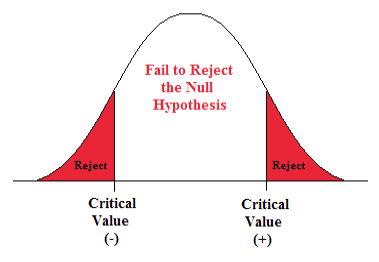

We have to look how the result that we determine from sample test statistic is extraordinary and how it has low probability. If probability is very low, we do reject the Ho hypothesis, if not we do not reject.




# What is our hypothesis?

#-

**We think that there are relation between heart disases and variables we selected.**

**In generally it is known that ,**

*If age increases, the number of people who suffering from heart disase increases.*

*If chestPain increases, the number of people who suffering from heart disase increases.*

*If tension increases, the number of people who suffering from heart disase increases.*

*If cholesterol increases, the number of people who suffering from heart disase increases.*

**And also, graphs shows that all of these variables's amount of effect to the person changes by Gender, however positive correlation do not change.**

#-

# **Analysis for our variables:**

We are taken our data from Heart.csv and this data is collecting since 1988.

And, 2022(now)-1988 = 34 Years.

#--------------------------

**Number of Patients: 1026**

Number of heart disase (Target): 526

**ratio: 526/1026 = %51**

It seems that every 1 person of 2 people faces with heart disases.

**Average of heart disase: 0.51**

#--------------------------

**Average of Age: 54.43**

Standart Deviation of Age: 9.07

#--------------------------

**Average of ChestPain: 0.94**

Standart Deviation of ChestPain: 1.02

#--------------------------

**Average of Tension (trestBPS): 131.61**

Standart Deviation of Tension (tresBPS): 17.51

#--------------------------

**Average of Cholestrol: 246**

Standart Deviation of Cholestrol: 51.59

#--------------------------

# **Formulas for Hypothesis testing**

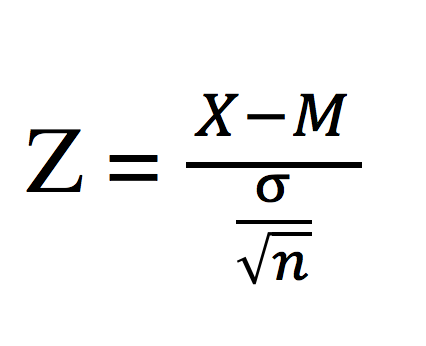


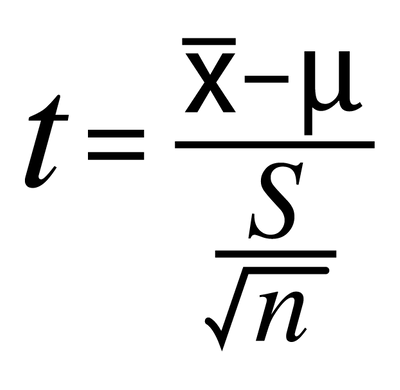



#Hypothesis Test

Hypothesis Test: We want to test whether there is correlation between variables and heart disases or above graph is due to chance.

#-

**1.Step**

Null Hypothesis (H0): There is no correlation between 'variables' and heart disases. For all case correlation is equal and 0.

*Ho: Uci1 = Uci2 = Uci3*

Alternative Hypothesis (HA): There is correlation between 'variables' and popularity of songs.For all case correlation is different.

*Ha: means Uci1 = Uci2 = Uci3

Significance Level: As most of hypothesis tests assume significance level as 0.05, we are setting it as 0.05 for our test too.

Ho = 0

Ha ≠ 0

#-

**2.Step**

Assume that H0 is true and calculate statistic.

t = m - Mo / (sd/n)

#---------

**For age:**

t = (54.43 - 0) / (9.07/ √34 )

t = 34.9921402025

test statistic ~ 35

#---------

**For ChestPain:**

t = (0.94 - 0) / (1.02/ √34 )

t = 5.37362233447

test statistic ~ 5.4

#---------

**For Tension:**

t = (131.61 - 0) / (17.51/ √34 )

t = 43.8270461954

test statistic ~ 44

#---------

**For Cholestrol:**

t = (246 - 0) / (51.59/ √34 )

t = 27.8041125437

test statistic ~ 28

#---------




**3.Step**

#**We create a form of two-tail graph to find area with T or Z table, the merge of all variable's graph will be similar like this:**

**With other ways such as drawing or websites we can determine critical value point and find the reject or not reject area.**

Text(0.5, 1.0, 'Two-Tail Form Graph')

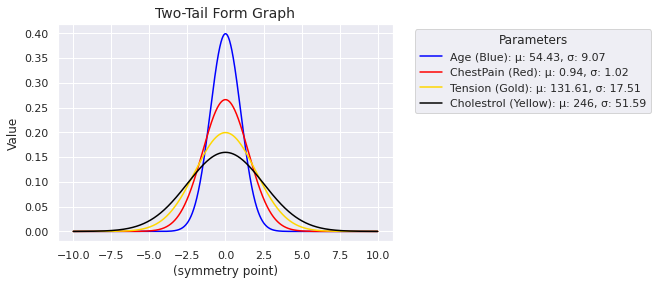

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#x-axis ranges from -5 and 5 with .001 steps
x = np.arange(-10, 10, 0.001)

#define multiple normal distributions
plt.plot(x, norm.pdf(x, 0, 1), label='Age (Blue): μ: 54.43, σ: 9.07', color='blue')
plt.plot(x, norm.pdf(x, 0, 1.5), label='ChestPain (Red): μ: 0.94, σ: 1.02', color='red')
plt.plot(x, norm.pdf(x, 0, 2), label='Tension (Gold): μ: 131.61, σ: 17.51', color='gold')
plt.plot(x, norm.pdf(x, 0, 2.5), label='Cholestrol (Yellow): μ: 246, σ: 51.59', color='black')

#add legend to plot
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title='Parameters')

#add axes labels and a title
plt.ylabel('Value')
plt.xlabel('(symmetry point)') #Merkez noktası
plt.title('Two-Tail Form Graph', fontsize=14)

#**Test Result of Age:**
#t > tc, Ho: reject#

**There is correlation**

#----------------------------

#**Test Result of ChestPain:**
#t > tc, Ho: reject#

**There is correlation**

#----------------------------

#**Test Result of Tension:**
#t > tc, Ho: reject#

**There is correlation**

#----------------------------

#**Test Result of Cholestrol:**
#t > tc, Ho: reject#

**There is correlation**

**The following graph will show us informations about Age:**

Text(0.5, 1.0, 'Age Graph')

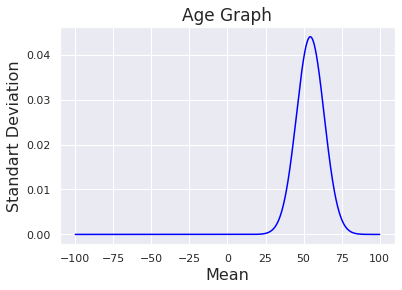

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.arange(-100, 100, 0.001)

#plot normal distribution with mean 0 and standard deviation 1
plt.plot(x, norm.pdf(x, 54.43, 9.07), label='μ: 0, σ: 1', color='blue')

#add axes labels and a title
plt.ylabel('Standart Deviation', fontsize=16)
plt.xlabel('Mean', fontsize=16) #Merkez noktası
plt.title('Age Graph', fontsize=17)

**The following graph will show us informations about ChestPain:**

Text(0.5, 1.0, 'ChestPain Graph')

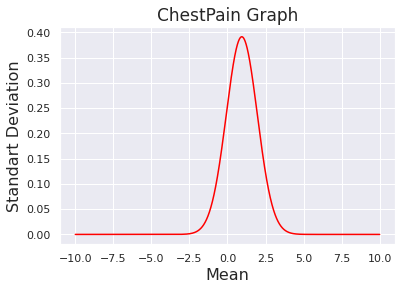

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.arange(-10, 10, 0.001)

#plot normal distribution with mean 0 and standard deviation 1
plt.plot(x, norm.pdf(x, 0.94, 1.02), label='μ:0, σ: 1.5', color='red')

#add axes labels and a title
plt.ylabel('Standart Deviation', fontsize=16)
plt.xlabel('Mean', fontsize=16) #Merkez noktası
plt.title('ChestPain Graph', fontsize=17)

**The following graph will show us informations about Tension:**

Text(0.5, 1.0, 'Tension Graph')

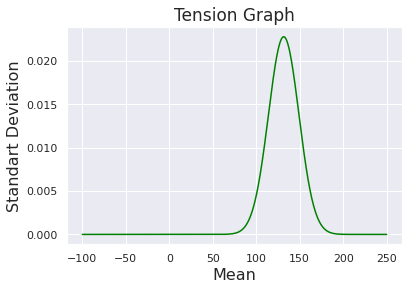

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#x-axis ranges from -3 and 3 with .001 steps
x = np.arange(-100, 250, 0.001)

#plot normal distribution with mean 0 and standard deviation 1
plt.plot(x, norm.pdf(x, 131.61, 17.51), label='μ:0, σ: 2', color='green')

#add axes labels and a title
plt.ylabel('Standart Deviation', fontsize=16)
plt.xlabel('Mean', fontsize=16) #Merkez noktası
plt.title('Tension Graph', fontsize=17)

**The following graph will show us informations about Cholestrol:**

Text(0.5, 1.0, 'Cholestrol Graph')

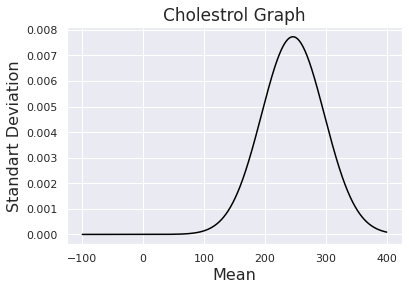

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#x-axis ranges from -3 and 3 with .001 steps
x = np.arange(-100, 400, 0.001)

#plot normal distribution with mean 0 and standard deviation 1
plt.plot(x, norm.pdf(x, 246, 51.59), label='μ:0, σ: 2.5', color='black')

#add axes labels and a title
plt.ylabel('Standart Deviation', fontsize=16)
plt.xlabel('Mean', fontsize=16) #Merkez noktası
plt.title('Cholestrol Graph', fontsize=17)

## Our Future Goal

<font color="blue">

**Our future goal is to investigate the relationship of all variables such as ChestPain, Age, Gender, now we want to combine them and create a prediction model. By doing this, we hope and think that it will be useful in the detection of potential heart attack patients in the health sector.**

<br>
</font>